<a href="https://colab.research.google.com/github/AbderrahmaneGuermat/Mineria-De-Datos/blob/master/Miner%C3%ADa_de_Datos_Trabajo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


-----

**IDENTIFICACIÓN DE PATRONES SUBMARINOS EN ESPECIES DE MACROINVERTEBRADOS DE MONITOREO ECOLÓGICO**

-----


**Proyecto realizado para el Master de Ciencia de Datos de la Universidad de Alicante**

**Asignatura:** Minería de Datos

**Creadores:**
* Abderrahmane Guermat
* Vanessa Lucía Ramos Rodriguez
* Ana María Ortiz Legación
* Kelly Turbay


# Introducción

El monitoreo ecológico de la Fundación Charles Darwin (FCD) - que ha sido guardiana de  y ha protegido especies como la tortuga de Galápagos, los tiburones, los pingüinos de Galápagos, entre otra fauna y flora endémicas -  es un programa que brinda información sobre el estado de la biota asociada a los fondos rocosos duros y permite determinar la naturaleza y magnitud de sus fluctuaciones a lo largo del tiempo y el espacio. Este programa permite evaluar la respuesta biológica frente a los factores ambientales y antropogénicos mediante el seguimiento e investigación a largo plazo de la biodiversidad, la composición y el funcionamiento de los sistemas marinos costeros. 

La pérdida de biodiversidad es una de las principales preocupaciones actuales, y que la solución a la crisis de la biodiversidad requiere la participación de múltiples grupos, desde los gobiernos y la comunidad científica hasta la sociedad civil (IPBES, 2019), sin embargo, sin información consistente y confiable sobre el estado de la biodiversidad que respalde los esfuerzos de conservación, se puede hacer poco o nada para combatir las crisis de la biodiversidad y la extinción (DPNG, 2014).

La FCD es consciente de que el hecho de contar con datos a largo plazo es imprescindible para detectar cambios, ya sean impactos acumulativos o crónicos, así mismo, entiende que comprender esta variación ecológica, así como las tendencias, es importante para desarrollar estrategias de manejo (Hewitt & Thrush, 2007). En este sentido, el Programa de Monitoreo Ecológico Submareal brinda la oportunidad no solo de observar, sino también de reaccionar ante los nuevos cambios en los ecosistemas, como los cambios de fase, la reducción de las poblaciones de peces, la invasión de especies no nativas, la disminución de especies de interés turístico y las posibles amenazas derivadas de los eventos de El Niño y el cambio climático. En consecuencia, este programa proporciona una herramienta valiosa para implementar medidas de manejo en la Reserva Marina de Galápagos.

# Objetivo del proyecto

Extraer patrones de comportamiento de las especies de macroinvertebrados sobre las áreas de captura de datos (transectos), analizando variables del entorno, temporales y características de las especies.

Para llegar al objetivo planteado, se ha considerado los siguientes puntos:
- Importación de las librerías adecuadas. 
- Análisis descriptivo y exploratorio aplicado sobre los datos.
- Preprocesamiento de los datos (análisis de duplicados, revisión de inconsistencias, análisis de datos faltantes) y transformación aplicado a los datos para la implementación del modelo.
- Aplicación de técnicas de aprendizaje automático.
- Evaluación del modelo y selección de la mejor solución.

# Información sobre el dataset

De acuerdo a lo mencionado por la FCD, los datos provienen de censos visuales de macroinvertebrados marinos. 

- **En cuanto a cómo se obtuvo la información:**
El monitoreo de macroinvertebrados móviles se enfoca en la medición simultánea de la densidad y abundancia de varias especies a la vez, incluyendo especies comerciales y no comerciales. Para esto, se evalúa principalmente la densidad en cada uno de los 20 cuadrantes de 1 m por 5 m ubicados a lo largo de una cinta de 50 m de longitud sobre el sustrato, todos a la misma profundidad. La identificación de especies en los cuadrantes se realiza a ambos lados de la cinta. Durante la identificación, se cuenta el número de individuos para realizar una estimación de abundancia, y también se toman medidas de tamaño según el grupo de monitoreo.

**Nombre del dataset:**  Macroinvertebrados.xlsx

**Campos que componen el dataset:**

01. **id**: Id representa año del monitoreo
02. **dive_date**: Fecha de la inmersión de buceo
03. **dive_month**: Mes de la inmersión de buceo
04. **year**: Año de la inmersión de buceo
05. **Transect.code**: Código de transecto/buceo
06. **Island**: Isla dónde se tomó la muestra
07. **Bioregion**: Bioregion dónde se tomó la muestra
08. **MPA_Status**: Status de Área Protegida Marina (APM)
09. **Sum_ind**: Suma de todos los individuos contados a lo largo del transecto
10. **Countsize_ind**: Número de individuos de esa especies medidos en el transecto
11. **TaxonID**: ID taxonomico de la colección FCD
12. **Domain**: Dominio taxonomico de la colección FCD
13. **Kingdom**: Reino taxonomico de la colección FCD
14. **PhylumOrDivision**: Filo o división taxonomico de la colección FCD
15. **Class**: Clase taxonomico de la colección FCD
16. **Order**: Orden taxonomico de la colección FCD
17. **Family**: Familia taxonomico de la colección FCD
18. **ScientificName**: Nombre científico de la especie
19. **CommonNameEnglish**: Nombre común en Inglés
20. **CommonNameSpanish**: Nombre común en Español
21. **Site**: Lugar del monitoreo
22. **Latitude**: Latitud del monitoreo
23. **Longitude**: Longitud del monitoreo
24. **Subzone.name**: Categorías de zonificación
25. **Refuge_Level**: Nivel de refugio
26. **depth_strata**: Estratos de profundidad 
27. **epoca**: Epoca del año


# Importación de librerías y datos

En este apartado se realiza la importación de las librerías necesarias para el pre-procesamiento, interpretación de resultados, análisis y visualización de los datos, así como la carga del dataset y el uso de diferentes técnicas de análisis como regresión, clasificación, ensembles y clustering.


In [ ]:
# Importamos las librerías de Python que necesitaremos en este notebook
import time
import warnings
import io
import random

import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
import matplotlib as mpl
import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import pickle # Serializar datos

from sklearn.impute import SimpleImputer # Imputación con la librería sklearn
from sklearn.impute import KNNImputer # Imputación  de valores faltantes utilizando el algoritmo K-Nearest Neighbors (KNN)

from sklearn.model_selection import train_test_split # Libreria para realizar train test
from sklearn.linear_model import LogisticRegression # Import for LogisticRegression
from sklearn.model_selection import KFold # Import for apply crossvalidation
from sklearn.preprocessing import MinMaxScaler # Import scaler

from sklearn.metrics import precision_score # Import para la métrica precission
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # R2, MAE y MSE
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC # Import para SVC
from sklearn.tree import DecisionTreeRegressor # Decision tree Regressor
from sklearn.neighbors import KNeighborsRegressor # Knn
from sklearn.svm import SVR # SVR

from sklearn.model_selection import KFold # Import for apply crossvalidation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler # Import scaler

from sklearn.linear_model import LinearRegression # LinearRegression

from sklearn.tree import DecisionTreeClassifier # Import para DecissionTree
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.utils.multiclass import unique_labels
from sklearn.tree import plot_tree
from sklearn.cluster import MiniBatchKMeans
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils.multiclass import unique_labels

from tqdm import tqdm
from itertools import cycle, islice
from scipy import stats
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from scipy.spatial.distance import squareform
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from typing import Optional

np.random.seed(0)
pd.options.mode.chained_assignment = None  # Evitamos warnings indeseados

In [ ]:
import datetime
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.linear_model import Ridge

## Carga del dataset

El dataset seleccionado contiene información sobre diferentes tipos de vinos españoles con 11 características. Entre ellas incluyen el nombre de la bodega, el nombre del vino, el año de la cosecha, la calificación promedio dada al vino por los usuarios, el número de usuarios que revisaron el vino, el país de origen (España), la región del vino, el precio en euros, el tipo de uva, la puntuación de cuerpo y la puntuación de acidez.

In [ ]:
# Obtención del fichero Excel 
data = pd.read_excel('/content/Macroinvertebrados.xlsx')
data_sum_ind2 = data.copy() 
data.head(5)

,id,dive_date,dive_month,year,Transect.code,Island,Bioregion,MPA_Status,Sum_ind,Countsize_ind,...,ScientificName,CommonNameEnglish,CommonNameSpanish,Site,Latitude,Longitude,Subzone.name,Refuge_Level,depth_strata,epoca
0,7,2010-02-04,February,2010,ES01M040210A,Española,Sureste,Extractive use,1,1,...,Diadema mexicanum,Hatpin urchin,erizo aguja,ES01-Bahía Gardner Norte (1),-1.34421,-89.6682,Conservación,Extractive use,6m,Caliente
1,7,2010-02-04,February,2010,ES01M040210A,Española,Sureste,Extractive use,203,95,...,Eucidaris galapagensis,Slate pencil urchin,erizo lapicero,ES01-Bahía Gardner Norte (1),-1.34421,-89.6682,Conservación,Extractive use,6m,Caliente
2,7,2010-02-04,February,2010,ES01M040210A,Española,Sureste,Extractive use,4,4,...,Holothuria (Halodeima) kefersteini,Sea cucumber,pepino de mar,ES01-Bahía Gardner Norte (1),-1.34421,-89.6682,Conservación,Extractive use,6m,Caliente
3,7,2010-02-04,February,2010,ES01M040210A,Española,Sureste,Extractive use,45,45,...,Lytechinus semituberculatus,Green sea urchin,erizo verde,ES01-Bahía Gardner Norte (1),-1.34421,-89.6682,Conservación,Extractive use,6m,Caliente
4,7,2010-02-04,February,2010,ES01M040210B,Española,Sureste,Extractive use,5,5,...,Diadema mexicanum,Hatpin urchin,erizo aguja,ES01-Bahía Gardner Norte (1),-1.34421,-89.6682,Conservación,Extractive use,15m,Caliente


# Descripción de los datos

Para analizar datos, es necesario tener una idea general de las características de un conjunto de datos. Para ello, se utilizarán diversas herramientas que nos permitirán conocer los datos a tratar y analizar los mismos. 

**- Composición de los datos**

In [ ]:
data.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7025 entries, 0 to 7024
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 7025 non-null   int64         
 1   dive_date          6933 non-null   datetime64[ns]
 2   dive_month         6933 non-null   object        
 3   year               7025 non-null   int64         
 4   Transect.code      7025 non-null   object        
 5   Island             6919 non-null   object        
 6   Bioregion          6980 non-null   object        
 7   MPA_Status         7025 non-null   object        
 8   Sum_ind            7025 non-null   int64         
 9   Countsize_ind      7025 non-null   int64         
 10  TaxonID            6782 non-null   float64       
 11  Domain             6782 non-null   object        
 12  Kingdom            6782 non-null   object        
 13  PhylumOrDivision   6782 non-null   object        
 14  Class   

Se identifica que el dataset está compuesto por **7.025 filas** y **27 columnas**. Cada fila representa XXX y cada columna corresponde a una característica de la muestra.

Así mismo, se observa que el dataset está compuesto por:
- 19 campos tipo **object** que pueden corresponder a tipo texto o una combinación de datos de texto y otros tipos de datos.
- 4 campos de tipo **int64**.
- 3 campos de tipo **float64**.
- 1 campo de tipo **datetime64**

La **memoria** utilizada por el objeto es de **1.4+ MB**.

**- Información estadística**

In [ ]:
# Se obtienen estadísticas descriptivas solo para 'Sum_ind' (Suma de todos los individuos contados 
# a lo largo del transecto) y 'Countsize_ind' (Número de individuos de esa especies medidos en el transecto).
subset_stats = data[['Sum_ind', 'Countsize_ind']].describe()
subset_stats

,Sum_ind,Countsize_ind
count,7025.000000,7025.000000
mean,60.198719,4.520712
std,156.153490,15.697667
min,0.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,1.000000
75%,22.000000,3.000000
max,2125.000000,423.000000


Aquí se muestra un **resumen estadístico** de un dos de las columnas numéricas del dataset, incluyendo medidas como el **número de observaciones**, la **media**, la **desviación estándar**, la **mediana**, el **valor mínimo y máximo**. Es importante mencionar que si hay valores faltantes (NaN) en los datos, el método los ignorará en los cálculos realizados.

En este caso, **no se puede concluir algo con esta información**, dado que la data presenta gran variedad. Es decir, que corresponde a distintos años, ubicación y especies, etc. De todas maneras, nos **permite ver la información de manera general**.

**- Valores únicos**

In [ ]:
datos = []
valores_unicos = data.Island.unique()
fila = ['Island', valores_unicos]
datos.append(fila) 
valores_unicos = data.Bioregion.unique()
fila = ['Bioregion', valores_unicos]
datos.append(fila) 
valores_unicos = data.MPA_Status.unique()
fila = ['MPA_Status', valores_unicos]
datos.append(fila) 
valores_unicos = data.Domain.unique()
fila = ['Domain', valores_unicos]
datos.append(fila) 
valores_unicos = data.Kingdom.unique()
fila = ['Kingdom', valores_unicos]
datos.append(fila) 
valores_unicos = data.PhylumOrDivision.unique()
fila = ['PhylumOrDivision', valores_unicos]
datos.append(fila) 
valores_unicos = data.Class.unique()
fila = ['Class', valores_unicos]
datos.append(fila) 
valores_unicos = data.Order.unique()
valores_unicos = valores_unicos[:5]
fila = ['Order', valores_unicos]
datos.append(fila) 
valores_unicos = data.Family.unique()
valores_unicos = valores_unicos[:5]
fila = ['Family', valores_unicos]
datos.append(fila) 
valores_unicos = data.ScientificName.unique()
valores_unicos = valores_unicos[:5]
fila = ['ScientificName', valores_unicos]
datos.append(fila) 
valores_unicos = data.CommonNameEnglish.unique()
valores_unicos = valores_unicos[:5]
fila = ['CommonNameEnglish', valores_unicos]
datos.append(fila) 
valores_unicos = data.CommonNameSpanish.unique()
valores_unicos = valores_unicos[:5]
fila = ['CommonNameSpanish', valores_unicos]
datos.append(fila) 
data = data.rename(columns={'Subzone.name': 'Subzone_name'})
valores_unicos = data.Subzone_name.unique()
fila = ['Subzone_name', valores_unicos]
datos.append(fila) 
valores_unicos = data.Site.unique()
valores_unicos = valores_unicos[:5]
fila = ['Site', valores_unicos]
datos.append(fila) 
valores_unicos = data.Refuge_Level.unique()
fila = ['Refuge_Level', valores_unicos]
datos.append(fila) 
valores_unicos = data.depth_strata.unique()
fila = ['depth_strata', valores_unicos]
datos.append(fila) 
valores_unicos = data.epoca.unique()
fila = ['epoca', valores_unicos]
datos.append(fila) 

data_vu = pd.DataFrame(datos, columns=['Columna', 'Valores únicos'])
print(data_vu)

              Columna                                     Valores únicos
0              Island  [Española, Fernandina, Floreana, Isabela, Sant...
1           Bioregion  [Sureste, Oeste, Bahía Elizabeth, Lejano Norte...
2          MPA_Status                        [Extractive use, Sanctuary]
3              Domain                                   [Eukaryota, nan]
4             Kingdom      [Animalia, nan, Chromalveolata (= Chromista)]
5    PhylumOrDivision  [Echinodermata, Mollusca, nan, Annelida, Arthr...
6               Class  [Echinoidea, Holothuroidea, Gastropoda, nan, A...
7               Order  [Diadematoida, Cidaroida, Holothuriida, Camaro...
8              Family  [Diadematidae, Cidaridae, Holothuriidae, Toxop...
9      ScientificName  [Diadema mexicanum, Eucidaris galapagensis, Ho...
10  CommonNameEnglish  [Hatpin urchin, Slate pencil urchin, Sea cucum...
11  CommonNameSpanish  [erizo aguja, erizo lapicero, pepino de mar, e...
12       Subzone_name  [Conservación, Intangible, A

Esta sección permite ver una **muestra de los valores únicos** que componen las columnas del dataset, e identificar valores nulos o inconsistentes en la información (como en el caso de las columnas Island, Bioregion, Domain, Kingdom, PhylumOrDivision, Subzone_name, Refuge_Level), los cuales deberán ser limpiados el apartado de preprocesamiento de la información. 


**- Valores nulos**

In [ ]:
datos = []

valores_nulos = data['dive_date'].isnull().sum()
fila = ['dive_date', valores_nulos]
datos.append(fila) 
valores_nulos = data['dive_month'].isnull().sum()
fila = ['dive_month', valores_nulos]
datos.append(fila) 
valores_nulos = data['year'].isnull().sum()
fila = ['year', valores_nulos]
datos.append(fila) 
data = data.rename(columns={'Transect.code': 'TransectCode'})
valores_nulos = data['TransectCode'].isnull().sum()
fila = ['TransectCode', valores_nulos]
datos.append(fila) 

valores_nulos = data['Island'].isnull().sum()
fila = ['Island', valores_nulos]
datos.append(fila) 
valores_nulos = data['Bioregion'].isnull().sum()
fila = ['Bioregion', valores_nulos]
datos.append(fila) 
valores_nulos = data['Domain'].isnull().sum()
fila = ['Domain', valores_nulos]
datos.append(fila) 
valores_nulos = data['Kingdom'].isnull().sum()
fila = ['Kingdom', valores_nulos]
datos.append(fila) 
valores_nulos = data['PhylumOrDivision'].isnull().sum()
fila = ['PhylumOrDivision', valores_nulos]
datos.append(fila) 
data = data.rename(columns={'Subzone.name': 'Subzone_name'})
valores_nulos = data['Subzone_name'].isnull().sum()
fila = ['Subzone_name', valores_nulos]
datos.append(fila) 
valores_nulos = data['Refuge_Level'].isnull().sum()
fila = ['Refuge_Level', valores_nulos]
datos.append(fila) 
valores_nulos = data['Sum_ind'].isnull().sum()
fila = ['Sum_ind', valores_nulos]
datos.append(fila) 
valores_nulos = data['Countsize_ind'].isnull().sum()
fila = ['Countsize_ind', valores_nulos]
datos.append(fila) 
valores_nulos = data['TaxonID'].isnull().sum()
fila = ['TaxonID', valores_nulos]
datos.append(fila) 
valores_nulos = data['Latitude'].isnull().sum()
fila = ['Latitude', valores_nulos]
datos.append(fila) 
valores_nulos = data['Longitude'].isnull().sum()
fila = ['Longitude', valores_nulos]
datos.append(fila) 

data_vn = pd.DataFrame(datos, columns=['Columna', 'Valores Nulos'])
print(data_vn)

             Columna  Valores Nulos
0          dive_date             92
1         dive_month             92
2               year              0
3       TransectCode              0
4             Island            106
5          Bioregion             45
6             Domain            243
7            Kingdom            243
8   PhylumOrDivision            243
9       Subzone_name             45
10      Refuge_Level             88
11           Sum_ind              0
12     Countsize_ind              0
13           TaxonID            243
14          Latitude             45
15         Longitude             45


En este apartado se observa que: 
- Para las columnas **Domain, Kingdom, PhylumOrDivision** y **TaxonID** existen **243 valores nulos**, lo cual representa un **3.46%** del total de la data. 
- Para la columna **Island** existen **106 valores nulos**, lo cual representa un **1.5%** del total de la data.
- Para la columna **dive_date** y **dive_month** se observa que existen **92 valores nulos**, lo cual representa un **1.09%** del total de la data.
- Para la columna **Refuge_Level** se observa que existen **88 valores nulos**, lo cual representa un **1.25%** del total de la data.
- Para la columna **Bioregion, Subzone_name, Latitude** y **Longitude** se observa que existen **45 valores nulos**, lo cual representa un **0.64%** del total de la data.


**- Valores únicos**

In [ ]:
# Se hace un conteo los valores únicos en cada columna
valores_unicos = data.nunique()
# Imprimir los resultados
valores_unicos

id                     10
dive_date             135
dive_month              8
year                   10
TransectCode         1093
Island                  9
Bioregion               5
MPA_Status              2
Sum_ind               606
Countsize_ind         109
TaxonID                76
Domain                  1
Kingdom                 2
PhylumOrDivision        6
Class                  11
Order                  22
Family                 47
ScientificName         90
CommonNameEnglish      61
CommonNameSpanish      61
Site                  100
Latitude               97
Longitude              97
Subzone_name            3
Refuge_Level            2
depth_strata            6
epoca                   2
dtype: int64

El cuadro anterior nos permite observar qué columnas cuentan con un solo valor. Esta información será de utilidad al momento de seleccionar las características que serán considerados para el modelo.

# Análisis de los datos
En este apartado se responderá a los distintos tipos de cuestionamientos con respecto al dataset elegido.

**¿Cómo ha sido la distribución de las especies según la isla (Island) donde se encuentran?**

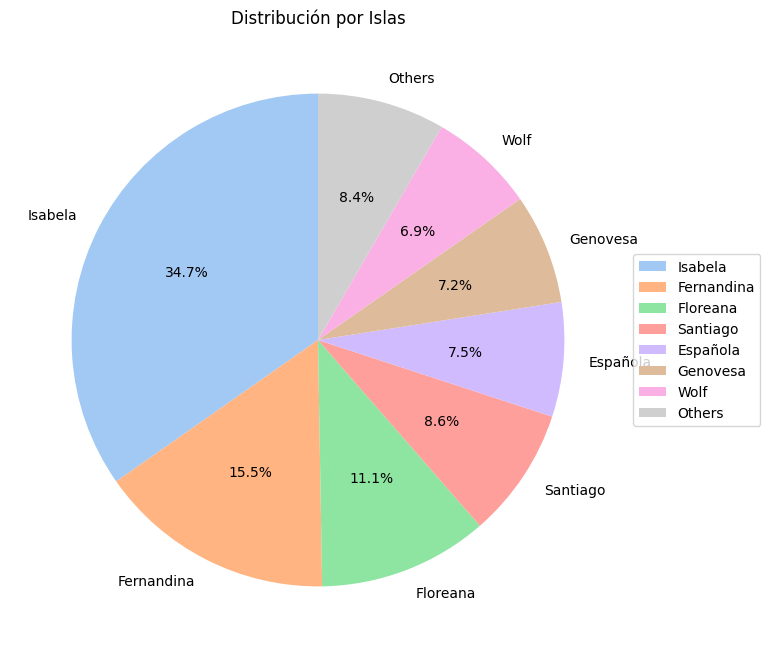

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener los datos de la columna "Island"
isla = data['Island'].value_counts()

# Obtener los dos primeros valores y la suma del resto de valores
top_categories = isla[:7]
other_categories = isla[7:].sum()

# Crear un diccionario con los datos
data_dict = {
    "Top Categories": top_categories.values.tolist() + [other_categories],
    "Category": top_categories.index.tolist() + ["Others"]
}

# Establecer la paleta de colores
sns.set_palette('pastel')

# Crear el gráfico de pastel
plt.figure(figsize=(8,8))
plt.pie(data_dict["Top Categories"], labels=data_dict["Category"], autopct='%1.1f%%', startangle=90, colors=sns.color_palette())

# Mostrar leyenda fuera del gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar título
plt.title("Distribución por Islas")

# Mostrar el gráfico
plt.show()

Como se puede observar en el gráfico anterior, la mayor cantidad de registros presentes en el dataset corresponden a información de la isla Isabela (34,7%), seguido por la isla Fernandina (15.5%) y Floreana (11.1%).

**¿Cuales son los Reinos Animales (Kingdom) presentes en el dataset y qué Filos o Divisiones (PhylumOrDivision) lo componen?**

El dataset esrá compuesto por dos reinos (kingdoms): Animalia y Chromalveolata, del dominio (domain) Eukaryota. Sin embargo, no hay especies contabilizadas en el reino Chromalveolata, por lo que en el siguiente gráfico solo se muestra la distribución del reino Animalia. 

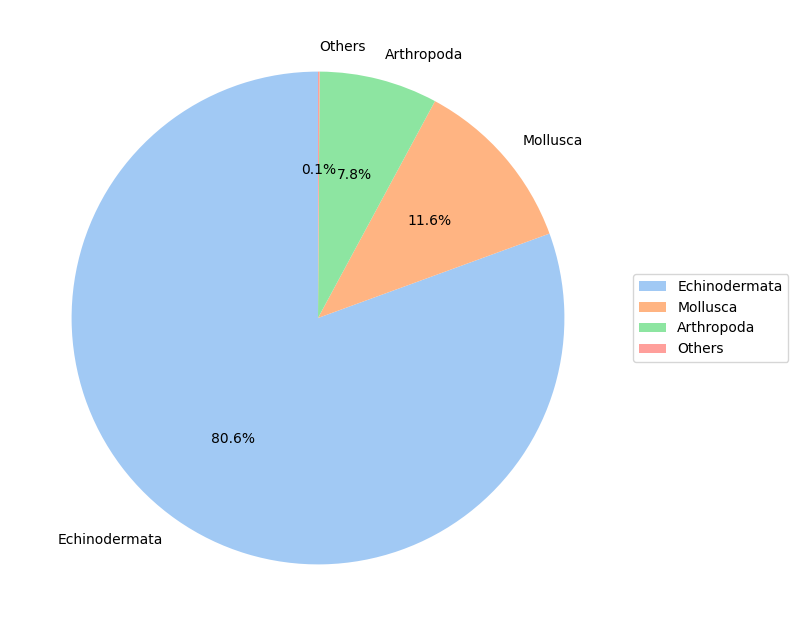

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener los datos de la columna "Island"
phylumOrDivision = data['PhylumOrDivision'].value_counts()

# Obtener los dos primeros valores y la suma del resto de valores
top_categories = phylumOrDivision[:3]
other_categories = phylumOrDivision[3:].sum()

# Crear un diccionario con los datos
data_dict = {
    "Top Categories": top_categories.values.tolist() + [other_categories],
    "Category": top_categories.index.tolist() + ["Others"]
}

# Establecer la paleta de colores
sns.set_palette('pastel')

# Crear el gráfico de pastel
plt.figure(figsize=(8,8))
plt.pie(data_dict["Top Categories"], labels=data_dict["Category"], autopct='%1.1f%%', startangle=90, colors=sns.color_palette())

# Mostrar leyenda fuera del gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.show()

Como se observa en el gráfico anterior, el datset está compuesto principalmente por tres Filos o Divisiones del reino animal: Echinodermata (con un 80.6%), Mollusca (con 11.6%) y Arthropoda (con 7.8%).

**¿Cuáles son las Clases (Class) del Reino animal presentes en este dataset y como están distribuidas según sus Órdenes (Order)?**


In [ ]:
import pandas as pd
import plotly.express as px

# Agrupar por las diferentes categorías/subcategorías
df_subcategories2 = data.groupby(['Class', 'Order']).size().reset_index(name='count')

# Calcular los porcentajes
total_count = df_subcategories2['count'].sum()
df_subcategories2['percentage'] = df_subcategories2['count'] / total_count * 100

# Crear el gráfico de treemap
fig = px.treemap(df_subcategories2, path=['Class', 'Order'], values='count', 
                 custom_data=['percentage'], hover_data=['percentage'])

# Actualizar la etiqueta de texto para mostrar los porcentajes
fig.update_traces(texttemplate='%{label}<br>%{customdata:.2f}%')

# Mostrar el gráfico
fig.show()


Como se puede observar en el gráfico anterior, cada color corresponde a una clase dentro del dataset. Así mismo, dentro de cada clase también se pueden observar las órdenes que la componen, y su distribución porcentual dentro del datset. Por ejemplo, podemos observar que la orden "Valvatida" es la que contiene la mayor cantidad de registros dentro del dataset, con un 27.46% del total de los registros, seguido por la orden "Cidaroida", con 15.97%. 

**¿Cuáles son las Órdenes (Order) del reino animal presentes en este dataset y como está distribuido según sus Familias (Family)?**


In [ ]:
import pandas as pd
import plotly.express as px

# Agrupar por las diferentes Categorias/subcategorias
df_subcategories2 = data.groupby(['Order', 'Family']).size().reset_index(name='count')

# Calcular los porcentajes
total_count = df_subcategories2['count'].sum()
df_subcategories2['percentage'] = df_subcategories2['count'] / total_count * 100

# Se añade la grafica dinámica
fig = px.treemap(df_subcategories2, path=['Order', 'Family'], values='count',
                  hover_data=['count', 'percentage'],
                  labels={'count': 'Count', 'percentage': 'Percentage'})

# Actualizar la etiqueta de texto para mostrar los valores y porcentajes
fig.update_traces(texttemplate='%{label}<br>Count: %{customdata[0]}<br>Percentage: %{customdata[1]:.2f}%')

fig.show()


En el gráfico anterior cada color corresponde a una Orden dentro del dataset. Así mismo, dentro de cada caja que corresponde al Orden también se pueden observar las familias que la componen y su distribución porcentual dentro del datset. Por ejemplo, podemos observar que la orden "Cidaridae" es la que contiene la mayor cantidad de registros dentro del dataset, con un 15.97% del total de los registros, seguido por la orden "Valvatida", con 14.88%. 

**¿Cuántos sitios (Sites) componen cada isla (Island) y como está distribuido en el dataset?**

In [ ]:
# Agrupar por las diferentes Categorias/subcategorias
df_subcategories = data.groupby(['Island', 'Site']).size().reset_index(name='counts')

# Se añade la grafica dinamica
fig = px.bar(df_subcategories, x='Island', y='counts', color='Site', 
             title='Sites por cada Isla', 
             labels={'Island': 'Island', 'counts': 'Número de registros', 
                     'Site': 'Site'})

# Se añade el input necesario para seleccionar la categoria
fig.update_layout(
    barmode='group',updatemenus=[
        dict(
            buttons=list([
                dict(
                    label=category,
                    method="update",
                    args=[{"visible": [category == x for x in df_subcategories['Island']]}],
                )
                for category in df_subcategories['Island'].unique()
            ]),
            direction="down",
            showactive=True,
            xanchor="left",
            yanchor="top",
            x=0.05,
            y=1.15
        ),
    ]
)

fig.show()

El gráfico anterior permite ver los sitios (Site) que componen cada isla (Island), y de qué manera están distribuidos dentro del dataset.

**¿Cómo está distribuído el dataset según su Subzona (subzone.name), Nivel de Refugio (Refuge_Level), Estrato de profundidad (depth_strata) y época?**

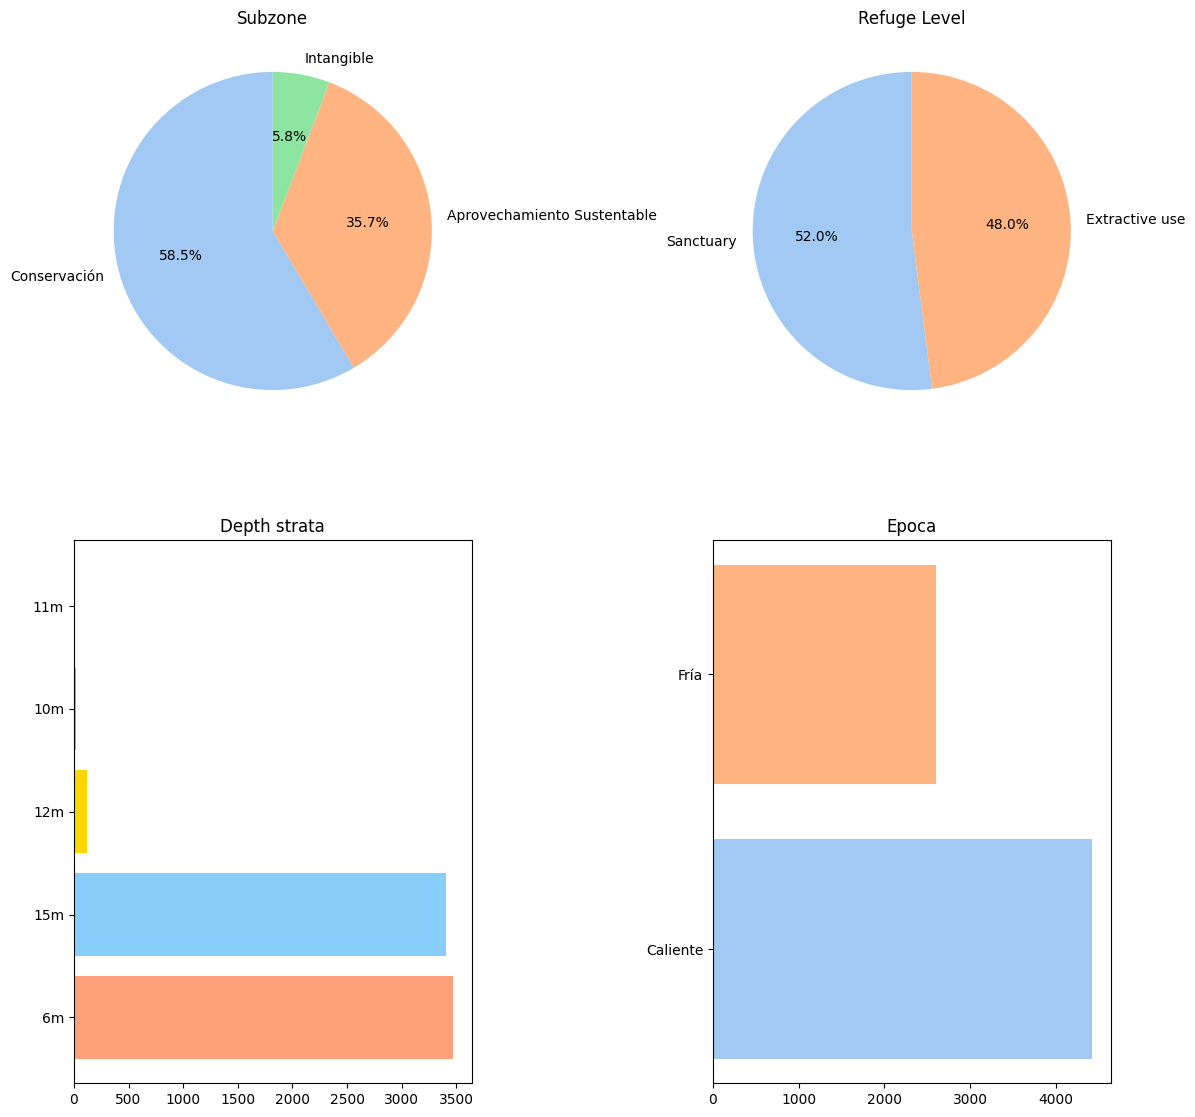

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener los datos de la columna "Subzone"
subzone = data['Subzone_name'].value_counts()
# Obtener los dos primeros valores
top_categories_subzone = subzone[:4]

# Obtener los datos de la columna "Refuge_Level"
refugelevel = data['Refuge_Level'].value_counts()
# Obtener los dos primeros valores
top_categories_refugelevel = refugelevel[:4]

# Obtener los datos de la columna "Refuge_Level"
depthstrata = data['depth_strata'].value_counts()
# Obtener los dos primeros valores
top_categories_depthstrata = depthstrata[:5]

# Obtener los datos de la columna "epoca"
epoca = data['epoca'].value_counts()
# Obtener los dos primeros valores
top_categories_epoca = epoca[:5]

# Crear un diccionario con los datos de cada gráfico
data_dict_subzone = {
    "Top Categories": top_categories_subzone.values.tolist(),
    "Category": top_categories_subzone.index.tolist()
}

data_dict_refugelevel = {
    "Top Categories": top_categories_refugelevel.values.tolist(),
    "Category": top_categories_refugelevel.index.tolist()
}

data_dict_depthstrata = {
    "Top Categories": top_categories_depthstrata.values.tolist(),
    "Category": top_categories_depthstrata.index.tolist()
}

data_dict_epoca = {
    "Top Categories": top_categories_epoca.values.tolist(),
    "Category": top_categories_epoca.index.tolist()
}

# Establecer la paleta de colores
sns.set_palette('pastel')

# Crear una figura y ejes con 2 filas y 2 columnas
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Gráfico 1 - Gráfico de pastel de Subzone
axs[0, 0].pie(data_dict_subzone["Top Categories"], labels=data_dict_subzone["Category"], autopct='%1.1f%%', startangle=90, colors=sns.color_palette())
axs[0, 0].set_title("Subzone")

# Gráfico 2 - Gráfico de pastel de Refuge_Level
axs[0, 1].pie(data_dict_refugelevel["Top Categories"], labels=data_dict_refugelevel["Category"], autopct='%1.1f%%', startangle=90, colors=sns.color_palette())
axs[0, 1].set_title("Refuge Level")

# Gráfico 3 - Gráfico de barras de Subzone con paleta personalizada
custom_palette = ["#FFA07A", "#87CEFA", "#FFD700", "#40E0D0"]
axs[1, 0].barh(data_dict_depthstrata["Category"], data_dict_depthstrata["Top Categories"], color=custom_palette)
axs[1, 0].set_title("Depth strata")

# Gráfico 4 - Gráfico de barras de epoca
axs[1, 1].barh(data_dict_epoca["Category"], data_dict_epoca["Top Categories"], color=sns.color_palette())
axs[1, 1].set_title("Epoca")

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


Tal como se puede ver en los gráficos anteriores, se puede apreciar que, en cuanto a la subzona (Subzone) se refiere, el dataset tiene una mayor cantidad de registros para la subzona "Conservación", con 58.5%, seguida por "Aprovechamiento Sustentable", con 35.7%. Por su parte, la subzona "Intangible" solo representa el 5.8% del total de los registros del dataset.

En cuanto al Nivel de refugio (Refuge level), "Sanctuary" tiene el 52% de los registros mientras que, por su parte, "Extrative use" solo tiene el 48% del total de los registros.

En cuanto al Estrato de profundidad (depth_strata), se observa que es más común encontrar registros con estrato de profundidad de 6 o 15 metros, siendo menos probable que se encuentren registros con 10, 11 o 12 metros de estrato de profundidad.

En cuanto a la época, podemos observar que existe una mayor cantidad de registros que contienen valor "Caliente" para este campo, sobre la cantidad de registros que contienen como valor "Frío".


# Preprocesamiento de los datos
El objetivo del preprocesamiento de datos es limpiar, transformar y preparar los datos para su análisis. En este apartado se han considerado técnicas de limpieza de datos, normalización de los datos, eliminación de valores atípicos, selección de características relevantes y la creación de nuevas características a partir de los datos existentes, seleccion por varianza, selección por valores ausentes, selección mediante visualización, entre otros. 

## Ajustes para valores ausentes o anómalos

**- Se eliminan las filas que contienen valores nulos en campos importantes para el modelo, pero que no pueden ser imputadas.**

- Algunas especies como "Holothuria (Stauropora) fuscocinerea", "Triplofusus princeps", etc, presenta valores nulos en las columnas que corresponden a su clasificación en el reino animal (Domain,	Kingdom, PhylumOrDivision, Class, Order, Family). Dado que consideramos que estos valores son importantes para nuestro modelo, retiraremos - por el momento - a estas especies del dataset.


In [ ]:
import pandas as pd

# Se eliminan filas con valores nulos en una columna específica
data = data.dropna(subset=['Domain'])

# Se revisan nuevamente la cantidad de valores nulos en cada columna
print(data.isnull().sum())


id                     0
dive_date             91
dive_month            91
year                   0
TransectCode           0
Island               106
Bioregion             45
MPA_Status             0
Sum_ind                0
Countsize_ind          0
TaxonID                0
Domain                 0
Kingdom                0
PhylumOrDivision       0
Class                  0
Order                  0
Family                 0
ScientificName         0
CommonNameEnglish     95
CommonNameSpanish    101
Site                   0
Latitude              45
Longitude             45
Subzone_name          45
Refuge_Level          86
depth_strata           0
epoca                  0
dtype: int64


- Dado que "Bioregion" es un campo importante para el modelo, y no puede ser imputado con la información que se encuentra en el dataset, los registros que contienen valores nulos para este campo serán eliminados.

In [ ]:
# Se eliminan filas con valores nulos en una columna específica
data = data.dropna(subset=['Bioregion'])

# Se revisan nuevamente la cantidad de valores nulos en cada columna
print(data.isnull().sum())


id                     0
dive_date             91
dive_month            91
year                   0
TransectCode           0
Island               106
Bioregion              0
MPA_Status             0
Sum_ind                0
Countsize_ind          0
TaxonID                0
Domain                 0
Kingdom                0
PhylumOrDivision       0
Class                  0
Order                  0
Family                 0
ScientificName         0
CommonNameEnglish     93
CommonNameSpanish     99
Site                   0
Latitude               0
Longitude              0
Subzone_name           0
Refuge_Level          41
depth_strata           0
epoca                  0
dtype: int64


- Como se puede observar, existen 91 registros que tienen valores nulos para el campo "dive_date" y "dive_month". Dado que es un campo importante para el modelo, y no puede ser imputado con la información que se encuentra en el dataset, los registros que contienen valores nulos para este campo serán eliminados.

In [ ]:
# Se eliminan filas con valores nulos en una columna específica
data = data.dropna(subset=['dive_date'])
data = data.dropna(subset=['dive_month'])

# Se revisan nuevamente la cantidad de valores nulos en cada columna
print(data.isnull().sum())


id                     0
dive_date              0
dive_month             0
year                   0
TransectCode           0
Island               106
Bioregion              0
MPA_Status             0
Sum_ind                0
Countsize_ind          0
TaxonID                0
Domain                 0
Kingdom                0
PhylumOrDivision       0
Class                  0
Order                  0
Family                 0
ScientificName         0
CommonNameEnglish     92
CommonNameSpanish     97
Site                   0
Latitude               0
Longitude              0
Subzone_name           0
Refuge_Level          41
depth_strata           0
epoca                  0
dtype: int64


## Imputación de valores ausentes

- Otra de las columnas que consideramos importante es la Isla (Island). Como se observa, ahora existen 106 registros que tienen valores nulos en este campo. Al analizar la informaciòn, también se observa que todos estos registros tienen en el campo Transecto un valor que empieza por PI, por lo que si se averigua este valor, se podría completar la información. Sin embargo, por lo pronto, se colocará un valor para poder identificarlo llamado "PI-PorIdentificar".

In [ ]:
# Reemplazar valores NA en la columna "Island" basado en la columna "Bioregion"
data.loc[data['Bioregion'] == 'Sureste', 'Island'] = 'SB-Por definir'
data.loc[data['Bioregion'] == 'Norte', 'Island'] = 'PI-Por definir'

# Se revisan nuevamente la cantidad de valores nulos en cada columna
print(data.isnull().sum())


id                    0
dive_date             0
dive_month            0
year                  0
TransectCode          0
Island                0
Bioregion             0
MPA_Status            0
Sum_ind               0
Countsize_ind         0
TaxonID               0
Domain                0
Kingdom               0
PhylumOrDivision      0
Class                 0
Order                 0
Family                0
ScientificName        0
CommonNameEnglish    92
CommonNameSpanish    97
Site                  0
Latitude              0
Longitude             0
Subzone_name          0
Refuge_Level         41
depth_strata          0
epoca                 0
dtype: int64


## Eliminación de columnas no relevantes para el modelo

Dado que los valores de "Refuge_Level" son iguales a los de "MPA_Status" se eliminará esta columna. Así mismo, dado que los nombres de las especies en inglés y en español (CommonNameEnglish y CommonNameSpanish) no son importantes para el modelo (ya que tenemos el nombre científico de la especie) se eliminarán estas columnas del dataset.

In [ ]:
data = data.drop('Refuge_Level', axis=1)
data = data.drop('CommonNameEnglish', axis=1)
data = data.drop('CommonNameSpanish', axis=1)

# Se eliminan registros duplicados en base a todas las columnas
data = data.drop_duplicates()

# Se revisan nuevamente la cantidad de valores nulos en cada columna
print(data.isnull().sum())


id                  0
dive_date           0
dive_month          0
year                0
TransectCode        0
Island              0
Bioregion           0
MPA_Status          0
Sum_ind             0
Countsize_ind       0
TaxonID             0
Domain              0
Kingdom             0
PhylumOrDivision    0
Class               0
Order               0
Family              0
ScientificName      0
Site                0
Latitude            0
Longitude           0
Subzone_name        0
depth_strata        0
epoca               0
dtype: int64


## Transformaciones y selección de características

**- Técnica One-hot**

A continuación, utilizaremos la técnica one-shot para normalizar las características del modelo, pero antes, haremos algunas otras transformaciones previas.
- Se crea una copia del Dataframe preprocesado hasta este punto


In [ ]:
data_oh = data.copy()

- Tranformamos los valores de la columna "depth_strata" a un valor numérico.

In [ ]:
data_oh['depth_strata'] = data_oh['depth_strata'].str.replace('m', '')
# Se renombra la variable a 'depth_strata (m)'
data_oh = data_oh.rename(columns={'depth_strata': 'depth_strata (m)'})

- A continuación, transformaremos el valor de "depth_strata (m)" a valor float.

In [ ]:
# Convertir variable tipo 'object' a 'float64'
data_oh['depth_strata (m)'] = data_oh['depth_strata (m)'].replace('-', np.nan)
data_oh['depth_strata (m)'] = data_oh['depth_strata (m)'].astype(float)

- A continuación, utilizaremos la técnica one-shot para normalizar las características del modelo.


In [ ]:
data_oh = data_oh.dropna(how='any').copy()

# Se hace un subconjunto. No se considera "Kingdom"
data_oh_tmp = data_oh[['dive_month', 'Island', 'Bioregion', 'MPA_Status', 'Kingdom', 'PhylumOrDivision', 'Class', 'Order', 'Family', 'ScientificName', 'Site', 'Subzone_name', 'epoca']]
data_oh_tmp = pd.get_dummies(data_oh_tmp, columns=['dive_month', 'Island', 'Bioregion', 'MPA_Status', 'Kingdom', 'PhylumOrDivision', 'Class', 'Order', 'Family', 'ScientificName', 'Site', 'Subzone_name', 'epoca'])
data_oh_tmp['depth_strata (m)'] = data_oh['depth_strata (m)']
data_oh_tmp['Latitude'] = data_oh['Latitude']
data_oh_tmp['Longitude'] = data_oh['Longitude']
data_oh_tmp['Sum_ind'] = data_oh['Sum_ind']

data_oh = data_oh_tmp

#Escalamos los datos
scaler = MinMaxScaler()
data_oh = pd.DataFrame(scaler.fit_transform(data_oh), columns=data_oh.columns)


## Dataset final (con técnica one-hot)

In [ ]:
data_oh.head(4)

,dive_month_April,dive_month_August,dive_month_February,dive_month_July,dive_month_June,dive_month_March,dive_month_May,dive_month_November,Island_Darwin,Island_Fernandina,...,Site_WO06-Wolf Fondeadero (2),Subzone_name_Aprovechamiento Sustentable,Subzone_name_Conservación,Subzone_name_Intangible,epoca_Caliente,epoca_Fría,depth_strata (m),Latitude,Longitude,Sum_ind
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.011189,0.939629,0.000471
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.011189,0.939629,0.095529
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.011189,0.939629,0.001882
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.011189,0.939629,0.021176


## Dataset final (con técnica label-encoding)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6645 entries, 0 to 7024
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                6645 non-null   int64         
 1   dive_date         6645 non-null   datetime64[ns]
 2   dive_month        6645 non-null   object        
 3   year              6645 non-null   int64         
 4   TransectCode      6645 non-null   object        
 5   Island            6645 non-null   object        
 6   Bioregion         6645 non-null   object        
 7   MPA_Status        6645 non-null   object        
 8   Sum_ind           6645 non-null   int64         
 9   Countsize_ind     6645 non-null   int64         
 10  TaxonID           6645 non-null   float64       
 11  Domain            6645 non-null   object        
 12  Kingdom           6645 non-null   object        
 13  PhylumOrDivision  6645 non-null   object        
 14  Class             6645 n

Previamente, se debe realizar una limpieza y preproceso de los datos.

En primer lugar, se observa que la variable 'dive_date' es de tipo datetime64, de manera que este debe ser depurado antes de implementar los algoritmos.

In [ ]:
# Se crea una copia del Dataframe original
#data_sum_ind = data.copy()
data_sum_ind = data_sum_ind2.copy()
# Se obtiene el día de la variable 'dive_data'
data_sum_ind.insert(4, 'month', data_sum_ind['dive_date'].dt.month)
data_sum_ind.insert(5, 'day', data_sum_ind['dive_date'].dt.day)

# Eliminación de las columnas 'dive_month' y 'dive_date'
data_sum_ind = data_sum_ind.drop('dive_month', axis=1)
data_sum_ind = data_sum_ind.drop('dive_date', axis=1)

Por otro lado, la variable 'depth_strata' contiene el número de metros de profundidad seguido de una 'm', por lo que, a continuación, se modifica esta variable para que solo contenga el número de metros de profundidad.

In [ ]:
data_sum_ind['depth_strata'] = data_sum_ind['depth_strata'].str.replace('m', '')

# Se renombra la variable a 'depth_strata (m)'
data_sum_ind = data_sum_ind.rename(columns={'depth_strata': 'depth_strata (m)'})

# Convertir variable tipo 'object' a 'float64'
data_sum_ind['depth_strata (m)'] = data_sum_ind['depth_strata (m)'].replace('-', np.nan)
data_sum_ind['depth_strata (m)'] = data_sum_ind['depth_strata (m)'].astype(float)

In [ ]:
data_sum_ind['Island_encoded'] = pd.factorize(data_sum_ind['Island'])[0]
island_mapping = pd.factorize(data_sum_ind['Island'])[1]

# Imprime el mapeo de las categorías
for i, island in enumerate(island_mapping):
    print(f"Valor numérico: {i}, Isla: {island}")

Valor numérico: 0, Isla: Española
Valor numérico: 1, Isla: Fernandina
Valor numérico: 2, Isla: Floreana
Valor numérico: 3, Isla: Isabela
Valor numérico: 4, Isla: Santiago
Valor numérico: 5, Isla: Darwin
Valor numérico: 6, Isla: Genovesa
Valor numérico: 7, Isla: Marchena
Valor numérico: 8, Isla: Wolf


In [ ]:
data_sum_ind['Bioregion_encoded'] = pd.factorize(data_sum_ind['Bioregion'])[0]
bioregion_mapping = pd.factorize(data_sum_ind['Bioregion'])[1]

# Imprime el mapeo de las categorías
for i, bioregion in enumerate(bioregion_mapping):
    print(f"Valor numérico: {i}, Bioregion: {bioregion}")

Valor numérico: 0, Bioregion: Sureste
Valor numérico: 1, Bioregion: Oeste
Valor numérico: 2, Bioregion: Bahía Elizabeth
Valor numérico: 3, Bioregion: Lejano Norte
Valor numérico: 4, Bioregion: Norte


In [ ]:
data_sum_ind['Site_encoded'] = pd.factorize(data_sum_ind['Site'])[0]
site_mapping = pd.factorize(data_sum_ind['Site'])[1]

# Imprime el mapeo de las categorías
for i, site in enumerate(site_mapping):
    print(f"Valor numérico: {i}, Site: {site}")

Valor numérico: 0, Site: ES01-Bahía Gardner Norte (1)
Valor numérico: 1, Site: ES02-Cerro Colorado
Valor numérico: 2, Site: ES03-Bajo Gardner
Valor numérico: 3, Site: ES04-Bahía Gardner Sur
Valor numérico: 4, Site: ES11-Bahía Gardner Norte (2)
Valor numérico: 5, Site: ES12-Isla Gardner
Valor numérico: 6, Site: FE01-Cabo Douglas Piedra Blanca
Valor numérico: 7, Site: FE04-Punta Espinosa Norte (2)
Valor numérico: 8, Site: FE06-Punta Espinosa Sur (2)
Valor numérico: 9, Site: FE10-Punta Priscila (2)
Valor numérico: 10, Site: FL13-Punta Cormorán
Valor numérico: 11, Site: FL01-Champion
Valor numérico: 12, Site: FL02-Corona del Diablo Norte
Valor numérico: 13, Site: FL03-Enderby
Valor numérico: 14, Site: FL05-La Botella
Valor numérico: 15, Site: FL09-Punta Luz de Día
Valor numérico: 16, Site: FL10-Los Barrancos
Valor numérico: 17, Site: FL12-Corona del Diablo Sur
Valor numérico: 18, Site: FL14-Tres Cuevitas
Valor numérico: 19, Site: FL15-Islote Caldwell
Valor numérico: 20, Site: FL16-Islote G

In [ ]:
data_sum_ind['MPA_Status_encoded'] = pd.factorize(data_sum_ind['MPA_Status'])[0]
MPA_Status_mapping = pd.factorize(data_sum_ind['MPA_Status'])[1]

# Imprime el mapeo de las categorías
for i, MPA_Status in enumerate(MPA_Status_mapping):
    print(f"Valor numérico: {i}, MPA_Status: {MPA_Status}")

Valor numérico: 0, MPA_Status: Extractive use
Valor numérico: 1, MPA_Status: Sanctuary


In [ ]:
data_sum_ind['PhylumOrDivision_encoded'] = pd.factorize(data_sum_ind['PhylumOrDivision'])[0]
PhylumOrDivision_mapping = pd.factorize(data_sum_ind['PhylumOrDivision'])[1]

# Imprime el mapeo de las categorías
for i, PhylumOrDivision in enumerate(PhylumOrDivision_mapping):
    print(f"Valor numérico: {i}, PhylumOrDivision: {PhylumOrDivision}")

Valor numérico: 0, PhylumOrDivision: Echinodermata
Valor numérico: 1, PhylumOrDivision: Mollusca
Valor numérico: 2, PhylumOrDivision: Annelida
Valor numérico: 3, PhylumOrDivision: Arthropoda
Valor numérico: 4, PhylumOrDivision: Ochrophyta
Valor numérico: 5, PhylumOrDivision: Platyhelminthes


In [ ]:
data_sum_ind['Class_encoded'] = pd.factorize(data_sum_ind['Class'])[0]
Class_mapping = pd.factorize(data_sum_ind['Class'])[1]

# Imprime el mapeo de las categorías
for i, Class in enumerate(Class_mapping):
    print(f"Valor numérico: {i}, Class: {Class}")

Valor numérico: 0, Class: Echinoidea
Valor numérico: 1, Class: Holothuroidea
Valor numérico: 2, Class: Gastropoda
Valor numérico: 3, Class: Asteroidea
Valor numérico: 4, Class: Polychaeta
Valor numérico: 5, Class: Malacostraca
Valor numérico: 6, Class: Cephalopoda
Valor numérico: 7, Class: Bivalvia
Valor numérico: 8, Class: Ophiuroidea
Valor numérico: 9, Class: Phaeophyceae
Valor numérico: 10, Class: Rhabditophora


In [ ]:
data_sum_ind['Order_encoded'] = pd.factorize(data_sum_ind['Order'])[0]
Order_mapping = pd.factorize(data_sum_ind['Order'])[1]

# Imprime el mapeo de las categorías
for i, Order in enumerate(Order_mapping):
    print(f"Valor numérico: {i}, Order: {Order}")

Valor numérico: 0, Order: Diadematoida
Valor numérico: 1, Order: Cidaroida
Valor numérico: 2, Order: Holothuriida
Valor numérico: 3, Order: Camarodonta
Valor numérico: 4, Order: Neogastropoda
Valor numérico: 5, Order: Valvatida
Valor numérico: 6, Order: Amphinomida
Valor numérico: 7, Order: Decapoda
Valor numérico: 8, Order: Synallactida
Valor numérico: 9, Order: Paxillosida
Valor numérico: 10, Order: Octopoda
Valor numérico: 11, Order: Nudibranchia
Valor numérico: 12, Order: Forcipulatida
Valor numérico: 13, Order: Pectinoida
Valor numérico: 14, Order: Ophiurida
Valor numérico: 15, Order: Littorinimorpha
Valor numérico: 16, Order: Pterioida
Valor numérico: 17, Order: Dictyotales
Valor numérico: 18, Order: Clypeasteroida
Valor numérico: 19, Order: Ophiacanthida
Valor numérico: 20, Order: Polycladida
Valor numérico: 21, Order: Veneroida


In [ ]:
data_sum_ind['Family_encoded'] = pd.factorize(data_sum_ind['Family'])[0]
Family_mapping = pd.factorize(data_sum_ind['Family'])[1]

# Imprime el mapeo de las categorías
for i, Family in enumerate(Family_mapping):
    print(f"Valor numérico: {i}, Family: {Family}")

Valor numérico: 0, Family: Diadematidae
Valor numérico: 1, Family: Cidaridae
Valor numérico: 2, Family: Holothuriidae
Valor numérico: 3, Family: Toxopneustidae
Valor numérico: 4, Family: Muricidae
Valor numérico: 5, Family: Oreasteridae
Valor numérico: 6, Family: Amphinomidae
Valor numérico: 7, Family: Diogenidae
Valor numérico: 8, Family: Stichopodidae
Valor numérico: 9, Family: Luidiidae
Valor numérico: 10, Family: Echinometridae
Valor numérico: 11, Family: Ophidiasteridae
Valor numérico: 12, Family: Rhynchocinetidae
Valor numérico: 13, Family: Asteropseidae
Valor numérico: 14, Family: Octopodidae
Valor numérico: 15, Family: Mithrodiidae
Valor numérico: 16, Family: Polyceridae
Valor numérico: 17, Family: Astropectinidae
Valor numérico: 18, Family: Percnidae
Valor numérico: 19, Family: Heliasteridae
Valor numérico: 20, Family: Palinuridae
Valor numérico: 21, Family: Inachidae
Valor numérico: 22, Family: Conidae
Valor numérico: 23, Family: Scyllaridae
Valor numérico: 24, Family: Pectin

In [ ]:
data_sum_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7025 entries, 0 to 7024
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        7025 non-null   int64  
 1   year                      7025 non-null   int64  
 2   month                     6933 non-null   float64
 3   day                       6933 non-null   float64
 4   Transect.code             7025 non-null   object 
 5   Island                    6919 non-null   object 
 6   Bioregion                 6980 non-null   object 
 7   MPA_Status                7025 non-null   object 
 8   Sum_ind                   7025 non-null   int64  
 9   Countsize_ind             7025 non-null   int64  
 10  TaxonID                   6782 non-null   float64
 11  Domain                    6782 non-null   object 
 12  Kingdom                   6782 non-null   object 
 13  PhylumOrDivision          6782 non-null   object 
 14  Class   

In [ ]:
data_sum_ind['Subzone_name_encoded'] = pd.factorize(data_sum_ind['Subzone.name'])[0]
Subzone_name_mapping = pd.factorize(data_sum_ind['Subzone.name'])[1]

# Imprime el mapeo de las categorías
for i, Subzone in enumerate(Subzone_name_mapping):
    print(f"Valor numérico: {i}, Subzone_name: {Subzone}")

Valor numérico: 0, Subzone_name: Conservación
Valor numérico: 1, Subzone_name: Intangible
Valor numérico: 2, Subzone_name: Aprovechamiento Sustentable


In [ ]:
data_sum_ind['epoca_encoded'] = pd.factorize(data_sum_ind['epoca'])[0]
epoca_mapping = pd.factorize(data_sum_ind['epoca'])[1]

# Imprime el mapeo de las categorías
for i, epoca in enumerate(epoca_mapping):
    print(f"Valor numérico: {i}, Epoca: {epoca}")

Valor numérico: 0, Epoca: Caliente
Valor numérico: 1, Epoca: Fría


In [ ]:
data_sum_ind['ScientificName_encoded'] = pd.factorize(data_sum_ind['ScientificName'])[0]
ScientificName_mapping = pd.factorize(data_sum_ind['ScientificName'])[1]

# Imprime el mapeo de las categorías
for i, ScientificName in enumerate(ScientificName_mapping):
    print(f"Valor numérico: {i}, ScientificName: {ScientificName}")

Valor numérico: 0, ScientificName: Diadema mexicanum
Valor numérico: 1, ScientificName: Eucidaris galapagensis
Valor numérico: 2, ScientificName: Holothuria (Halodeima) kefersteini
Valor numérico: 3, ScientificName: Lytechinus semituberculatus
Valor numérico: 4, ScientificName: Hexaplex princeps
Valor numérico: 5, ScientificName: Holothuria (Platyperona) difficilis
Valor numérico: 6, ScientificName: Pentaceraster cumingi
Valor numérico: 7, ScientificName: Nidorellia armata
Valor numérico: 8, ScientificName: Eurythoe complanata
Valor numérico: 9, ScientificName: Holothuria (Stauropora) fuscocinerea
Valor numérico: 10, ScientificName: Aniculus elegans
Valor numérico: 11, ScientificName: Centrostephanus coronatus
Valor numérico: 12, ScientificName: Isostichopus fuscus
Valor numérico: 13, ScientificName: Luidia bellonae
Valor numérico: 14, ScientificName: Triplofusus princeps
Valor numérico: 15, ScientificName: Caenocentrotus gibbosus
Valor numérico: 16, ScientificName: Pharia pyramidata
V

Además, se procede a la eliminación de otras variables que no son de interés como 'Transect.code'.

In [ ]:
# Eliminación de columnas que no son de interés
#data_sum_ind = data_sum_ind.drop('id', axis=1)
data_sum_ind = data_sum_ind.drop('TaxonID', axis=1)
data_sum_ind = data_sum_ind.drop('Domain', axis=1)
data_sum_ind = data_sum_ind.drop('Kingdom', axis=1)
data_sum_ind = data_sum_ind.drop('CommonNameEnglish', axis=1)
data_sum_ind = data_sum_ind.drop('CommonNameSpanish', axis=1)
data_sum_ind = data_sum_ind.drop('Subzone.name', axis=1)
data_sum_ind = data_sum_ind.drop('Refuge_Level', axis=1)
data_sum_ind = data_sum_ind.drop('PhylumOrDivision', axis=1)
data_sum_ind = data_sum_ind.drop('Class', axis=1)
data_sum_ind = data_sum_ind.drop('Order', axis=1)
data_sum_ind = data_sum_ind.drop('Family', axis=1)
data_sum_ind = data_sum_ind.drop('Island', axis=1)
data_sum_ind = data_sum_ind.drop('Site', axis=1)
data_sum_ind = data_sum_ind.drop('Bioregion', axis=1)
data_sum_ind = data_sum_ind.drop('ScientificName', axis=1)
data_sum_ind = data_sum_ind.drop('epoca', axis=1)

# Variar según la variable objetivo
data_sum_ind = data_sum_ind.drop('MPA_Status', axis=1)
data_sum_ind = data_sum_ind.drop('Countsize_ind', axis=1)
data_sum_ind = data_sum_ind.drop('Transect.code', axis=1)
data_sum_ind = data_sum_ind.drop('id', axis=1)



Se eliminan los valores NaN.

In [ ]:
data_sum_ind = data_sum_ind.dropna()

In [ ]:
data_sum_ind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6880 entries, 0 to 7024
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      6880 non-null   int64  
 1   month                     6880 non-null   float64
 2   day                       6880 non-null   float64
 3   Sum_ind                   6880 non-null   int64  
 4   Latitude                  6880 non-null   float64
 5   Longitude                 6880 non-null   float64
 6   depth_strata (m)          6880 non-null   float64
 7   Island_encoded            6880 non-null   int64  
 8   Bioregion_encoded         6880 non-null   int64  
 9   Site_encoded              6880 non-null   int64  
 10  MPA_Status_encoded        6880 non-null   int64  
 11  PhylumOrDivision_encoded  6880 non-null   int64  
 12  Class_encoded             6880 non-null   int64  
 13  Order_encoded             6880 non-null   int64  
 14  Family_e

# Modelos de predicción

## Tarea de regresión (ONE-HOT)


En esta tarea, se ha seleccionado como variable a predecir la correspondiente con 'Sum_ind', la cual indica la suma de todos los individuos contados a lo largo del transecto.

Concretamente, se emplearán diferentes técnicas de regresión con el fin de obtener el mejor modelo que pueda predecir la variable 'Sum_ind' a partir de las características y de las variables existentes en el conjunto de datos. Cabe destacar que durante este estudio se utiliza el dataset final que ha sido trabajado mediante la técnica one-hot.


En primer lugar, se deben crear dos datasets, de manera que el dataset 'x' corresponde al conjunto de datos que contiene las variables predictoras, mientras que el dataset 'y' contendrá únicamente la variable objetivo 'Sum_ind'.

In [ ]:
# Variables predictoras (todas las columnas excepto quality)
x = data_oh.drop('Sum_ind', axis=1)

# Variable objetivo (quality)
y = data_oh['Sum_ind']

A continuación, se realiza un split, de forma que se utiiza un 70% de los datos para el conjunto de datos de entrenamiento y un 30% para el conjunto de datos de test.

In [ ]:
# 70% de los datos para el train y el 30% de los datos para el test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
# tamaño y forma de los conjuntos de entrenamiento y test para 'x' e 'y'
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4645, 287) (1992, 287) (4645,) (1992,)


Una vez se ha dividido el conjunto de datos, se procede a entrenar los distintos algoritmos de regresión con el fin de obtener diferentes modelos que serán comparados y evaluados para seleccionar el modelo que mejor se ajuste.

El primer algoritmo a usar corresponde al algoritmo **DecisionTreeRegressor**, el cual se implementará con diferentes parámetros con el fin de observar su efecto.

Concretamente, el parámetro que se modificará corresponde al parámetro 'max_depth', de manera que se entrenará el algoritmo con un nivel de profundidad de 1 a 20. Por otro lado, el modelo será evaluado mediante R2.

In [ ]:
train_scores = []
test_scores = []

# Valores del parametro max_depth
values = [i for i in range(1, 21)]

# Evaluamos el arbol de decision para cada uno de los valores
for i in values:
	# Creamos modelo
	model = DecisionTreeRegressor(max_depth=i)
 
	# fit model
	model.fit(x_train, y_train)
 
	# evaluate on the train dataset
	train_predict = model.predict(x_train)
	train_r2 = round(r2_score(y_train, train_predict), 3)
	train_scores.append(train_r2)
 
	# evaluate on the test dataset
	test_predict = model.predict(x_test)
	test_r2 = round(r2_score(y_test, test_predict),3)
	test_scores.append(test_r2)
 
	# Print result
	print("Iteración", i, "Train:", train_r2, ", Test:", test_r2)

Iteración 1 Train: 0.374 , Test: 0.378
Iteración 2 Train: 0.447 , Test: 0.437
Iteración 3 Train: 0.479 , Test: 0.425
Iteración 4 Train: 0.511 , Test: 0.44
Iteración 5 Train: 0.562 , Test: 0.435
Iteración 6 Train: 0.598 , Test: 0.449
Iteración 7 Train: 0.643 , Test: 0.447
Iteración 8 Train: 0.695 , Test: 0.428
Iteración 9 Train: 0.743 , Test: 0.425
Iteración 10 Train: 0.777 , Test: 0.418
Iteración 11 Train: 0.815 , Test: 0.416
Iteración 12 Train: 0.841 , Test: 0.401
Iteración 13 Train: 0.861 , Test: 0.387
Iteración 14 Train: 0.879 , Test: 0.368
Iteración 15 Train: 0.894 , Test: 0.39
Iteración 16 Train: 0.907 , Test: 0.406
Iteración 17 Train: 0.918 , Test: 0.359
Iteración 18 Train: 0.928 , Test: 0.408
Iteración 19 Train: 0.936 , Test: 0.356
Iteración 20 Train: 0.942 , Test: 0.354


El resultado muestra el valor de R2 para cada iteración tanto para el conjunto de entrenamiento como para el conjunto de test, de manera que se puede observar la evolución del rendimiento del modelo según el valor de 'max_depth'.

Se observa que a medida que aumenta el valor de 'max_depth', el valor de R2 en el conjunto de entrenamiento aumenta acercándose a 1. No obstante, el valor de R2 en el conjunto de test obtiene su máximo valor para 'max_depth = 6', observándose cómo el R2 disminuye a partir de este punto.

Con ello, se puede concluir que el modelo que mejor se ajusta a los datos para el algoritmo **DecisionTreeRegressor** se alcanza con el valor 'max_depth = 6'.

Asimismo, se dibuja una gráfica con los valores obtenidos de R2 para cada uno de los niveles de profundidad del árbol, tanto para el conjunto de datos de entrenamiento como para el conjunto de datos de test.

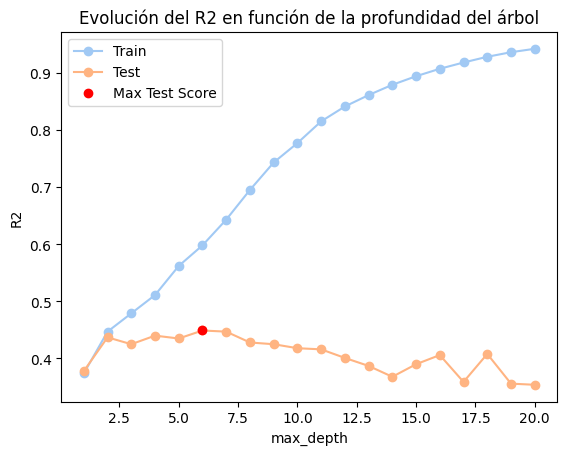

In [ ]:
# Grafica con los valores del train y test para cada uno de los arboles de decision en funcion de r2
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.xlabel("max_depth")
pyplot.ylabel("R2")

max_test_index = np.argmax(test_scores)
max_test_score = test_scores[max_test_index]
max_test_depth = values[max_test_index]
pyplot.plot(max_test_depth, max_test_score, 'ro', label='Max Test Score')

pyplot.legend()
pyplot.title("Evolución del R2 en función de la profundidad del árbol")
pyplot.show()

In [ ]:
print(f'Máximo puntaje de prueba: {max_test_score:.3f} con profundidad máxima: {max_test_depth}')

Máximo puntaje de prueba: 0.449 con profundidad máxima: 6


En la gráfica anterior se muestra la evolución del valor R2 en función del parámetro 'max_depth'. Concretamente, en azul claro se representan los valores de R2 para el conjunto de datos de entrenamiento, mientras que en naranja claro se observa el valor de R2 para el conjunto de datos de test. Asimismo, se representa en color rojo el punto máximo de R2 (0.449) para el conjunto de datos de test, el cual se alcanza en el nivel de profundidad igual a 6.

Cabe destacar que en la implementación anterior del modelo, este se evaluó utilizando una única partición de datos, lo cual podría llevar a una evaluación poco fiable debido a la posible variabilidad de datos. Concretamente, en entornos reales resulta más eficiente realizar validación cruzada (cross validation). Por tanto, a continuación se implementará la validación cruzada con el fin de obtener una evaluación más fiable y robusta del modelo con el algoritmo DecisionTreeRegressor.

Cabe destacar que, para este caso, el rango de valores para la profundidad del árbol se ha reducido de 20 a 10, ya que anteriormente se ha visualizado que la métrica R2 comienza a disminuir a partir de 'max_depth' igual a 10 aproximadamente.

In [ ]:
# Valores del parametro max_depth
values = [i for i in range(1, 11)]

# Definimos los diferentes valores de cv que queremos probar
cv_values = [5, 10, 15]

# Diccionario para almacenar los valores de entrenamiento y prueba para cada valor de cv
scores_dict = {}

# Evaluamos el arbol de decision para cada uno de los valores
for cv in cv_values:
    train_scores = []
    test_scores = []
    for i in values:
        # Creamos modelo
        model = DecisionTreeRegressor(max_depth=i)

        # Realizamos la validación cruzada
        scores = cross_validate(model, x, y, cv=cv, scoring='r2', return_train_score=True)

        # Calculamos los promedios de las puntuaciones de entrenamiento y prueba para este valor de max_depth
        train_score = np.mean(scores['train_score'])
        test_score = np.mean(scores['test_score'])
        train_scores.append(train_score)
        test_scores.append(test_score)

        # Imprimimos los resultados de esta iteración
        print("cv=", cv, ", max_depth=", i, ", train_score=", round(train_score, 3), ", test_score=", round(test_score, 3))

    # Almacenamos los resultados de entrenamiento y prueba en el diccionario para este valor de cv
    scores_dict[cv] = {'train': train_scores, 'test': test_scores}

cv= 5 , max_depth= 1 , train_score= 0.377 , test_score= 0.378
cv= 5 , max_depth= 2 , train_score= 0.448 , test_score= 0.447
cv= 5 , max_depth= 3 , train_score= 0.486 , test_score= 0.462
cv= 5 , max_depth= 4 , train_score= 0.524 , test_score= 0.487
cv= 5 , max_depth= 5 , train_score= 0.57 , test_score= 0.476
cv= 5 , max_depth= 6 , train_score= 0.627 , test_score= 0.432
cv= 5 , max_depth= 7 , train_score= 0.666 , test_score= 0.441
cv= 5 , max_depth= 8 , train_score= 0.7 , test_score= 0.428
cv= 5 , max_depth= 9 , train_score= 0.746 , test_score= 0.439
cv= 5 , max_depth= 10 , train_score= 0.783 , test_score= 0.421
cv= 10 , max_depth= 1 , train_score= 0.376 , test_score= 0.378
cv= 10 , max_depth= 2 , train_score= 0.447 , test_score= 0.449
cv= 10 , max_depth= 3 , train_score= 0.483 , test_score= 0.455
cv= 10 , max_depth= 4 , train_score= 0.516 , test_score= 0.476
cv= 10 , max_depth= 5 , train_score= 0.562 , test_score= 0.441
cv= 10 , max_depth= 6 , train_score= 0.614 , test_score= 0.454
cv= 

Los resultados ahora representan el rendimiento del modelo en base al valor R2 para diferentes valores de 'max_depth' y diferentes valores de cv (número de folds en la validación cruzada).

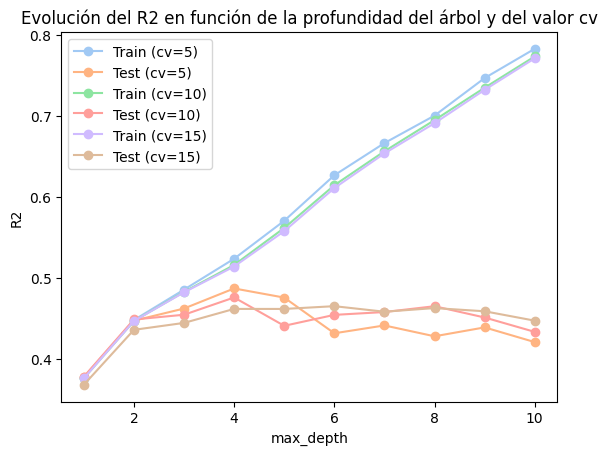

In [ ]:
# Graficamos los resultados de entrenamiento y prueba para cada valor de cv
for cv in cv_values:
    pyplot.plot(values, scores_dict[cv]['train'], '-o', label='Train (cv='+str(cv)+')')
    pyplot.plot(values, scores_dict[cv]['test'], '-o', label='Test (cv='+str(cv)+')')

pyplot.xlabel("max_depth")
pyplot.ylabel("R2")
pyplot.legend()
pyplot.title("Evolución del R2 en función de la profundidad del árbol y del valor cv")
pyplot.show()

En la gráfica anterior, se muestran de nuevo la evolución del valor R2 en función del parámetro 'max_depth', pero añadiendo además el parámetro cv de la validación cruzada.

En este sentido, se puede observar que al implementar la validación cruzada, los valores de R2 para los diferentes valores de cv son consistentes y no existe una gran variación en los resultados.

In [ ]:
max_test_score, cv, max_depth = max((max(scores_dict[cv]['test']), cv, scores_dict[cv]['test'].index(max(scores_dict[cv]['test'])) + 1) for cv in cv_values)

print(f"Según el algoritmo DecisionTreeRegressor, el máximo valor de R2 en el conjunto de test es {max_test_score:.3f} con cv={cv} y max_depth={max_depth}.")


Según el algoritmo DecisionTreeRegressor, el máximo valor de R2 en el conjunto de test es 0.487 con cv=5 y max_depth=4.


Finalmente, se tiene que el mejor resultado de R2 se alcanza para cv=5 y max_depth=4 (el cual difiere del valor obtenido previamente sin validación cruzada), con un valor de R2 de 0.487, siendo este ligeramente mayor al 0.449 obtenido anteriormente sin validación cruzada.

En segundo lugar, se utiliza el algoritmo **Ridge regression** implementándose desde un principio la validación cruzada.

In [ ]:
# Definir valores de alpha
alpha_values = [0.01, 0.1, 1, 10, 100]

# Definir valores de cv
cv_values = [5, 10, 15]

# Diccionario para almacenar los valores de entrenamiento y prueba para cada valor de cv y alpha
scores_dict = {}

# Evaluar la regresión de Ridge para cada valor de cv y alpha
for cv in cv_values:
    train_scores = []
    test_scores = []
    for alpha in alpha_values:
        # Crear modelo
        model = Ridge(alpha=alpha)

        # Realizar la validación cruzada
        scores = cross_validate(model, x, y, cv=cv, scoring='r2', return_train_score=True)

        # Calcular los promedios de las puntuaciones de entrenamiento y prueba para este valor de alpha
        train_score = np.mean(scores['train_score'])
        test_score = np.mean(scores['test_score'])
        train_scores.append(train_score)
        test_scores.append(test_score)

        # Imprimir los resultados de esta iteración
        print("cv=", cv, ", alpha=", alpha, ", train_score=", round(train_score, 3), ", test_score=", round(test_score, 3))

    # Almacenar los resultados de entrenamiento y prueba en el diccionario para este valor de cv
    scores_dict[cv] = {'train': train_scores, 'test': test_scores}


cv= 5 , alpha= 0.01 , train_score= 0.464 , test_score= 0.434
cv= 5 , alpha= 0.1 , train_score= 0.464 , test_score= 0.434
cv= 5 , alpha= 1 , train_score= 0.464 , test_score= 0.435
cv= 5 , alpha= 10 , train_score= 0.461 , test_score= 0.437
cv= 5 , alpha= 100 , train_score= 0.445 , test_score= 0.432
cv= 10 , alpha= 0.01 , train_score= 0.462 , test_score= 0.436
cv= 10 , alpha= 0.1 , train_score= 0.462 , test_score= 0.437
cv= 10 , alpha= 1 , train_score= 0.462 , test_score= 0.437
cv= 10 , alpha= 10 , train_score= 0.459 , test_score= 0.438
cv= 10 , alpha= 100 , train_score= 0.444 , test_score= 0.434
cv= 15 , alpha= 0.01 , train_score= 0.461 , test_score= 0.427
cv= 15 , alpha= 0.1 , train_score= 0.461 , test_score= 0.427
cv= 15 , alpha= 1 , train_score= 0.461 , test_score= 0.428
cv= 15 , alpha= 10 , train_score= 0.459 , test_score= 0.429
cv= 15 , alpha= 100 , train_score= 0.444 , test_score= 0.425


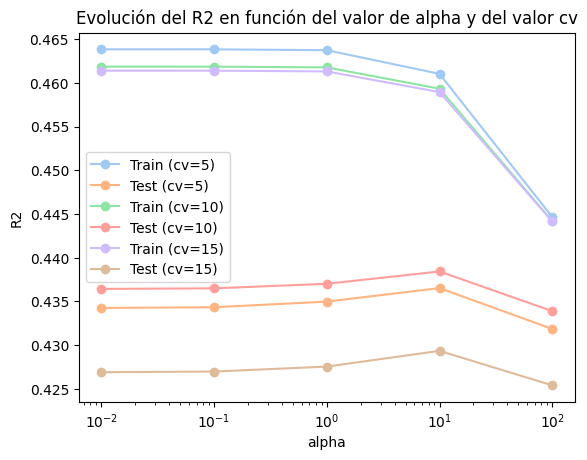

In [ ]:
# Graficamos los resultados de entrenamiento y prueba para cada valor de cv
for cv in cv_values:
    pyplot.plot(alpha_values, scores_dict[cv]['train'], '-o', label='Train (cv='+str(cv)+')')
    pyplot.plot(alpha_values, scores_dict[cv]['test'], '-o', label='Test (cv='+str(cv)+')')

pyplot.xlabel("alpha")
pyplot.ylabel("R2")
pyplot.xscale('log')
pyplot.legend()
pyplot.title("Evolución del R2 en función del valor de alpha y del valor cv")
pyplot.show()

In [ ]:
max_test_score, cv, alpha = max((max(scores_dict[cv]['test']), cv, alpha_values[scores_dict[cv]['test'].index(max(scores_dict[cv]['test']))]) for cv in cv_values)

print(f"Según el algoritmo Ridge regression, el máximo valor de R2 en el conjunto de test es {max_test_score:.3f} con cv={cv} y alpha={alpha}.")


Según el algoritmo Ridge regression, el máximo valor de R2 en el conjunto de test es 0.438 con cv=10 y alpha=10.


Una vez observados los resultados de R2 para el algoritmo **Ridge regression** en función de distintos valores tanto para 'cv' como para 'alpha' se puede concluir que, en general, los valores de R2 en el conjunto de prueba son similares para los diferentes valores de 'alpha' y 'cv'. Es decir, el modelo no es muy sensible a estos parámetros en este rango de valores. No obstante, el valor óptimo se obtiene para R2 igual a 0.438 para los valores de cv=10 y alpha=10.

A continuación, se implementa el algoritmo **KNN Regression**. Concretamente, este algoritmo debe recibir el parámetro 'n_neighbors', es por ello que se prueban diferentes valores: [1, 3, 5, 7, 9, 11, 13, 15]. Asimismo, se vuelve a implementar la validación cruzada.

In [ ]:
# Valores del parámetro n_neighbors
n_values = [1, 3, 5, 7, 9, 11, 13, 15]

# Definimos los diferentes valores de cv que queremos probar
cv_values = [5, 10, 15]

# Diccionario para almacenar los valores de entrenamiento y prueba para cada valor de cv y n_neighbors
scores_dict = {}

# Evaluamos KNN Regression para cada combinación de valores de cv y n_neighbors
for cv in cv_values:
    train_scores = []
    test_scores = []
    for n in n_values:
        # Creamos el modelo
        model = KNeighborsRegressor(n_neighbors=n)

        # Realizamos la validación cruzada
        scores = cross_validate(model, x, y, cv=cv, scoring='r2', return_train_score=True)

        # Calculamos los promedios de las puntuaciones de entrenamiento y prueba para este valor de n_neighbors
        train_score = np.mean(scores['train_score'])
        test_score = np.mean(scores['test_score'])
        train_scores.append(train_score)
        test_scores.append(test_score)

        # Imprimimos los resultados de esta iteración
        print("cv=", cv, ", n_neighbors=", n, ", train_score=", round(train_score, 3), ", test_score=", round(test_score, 3))

    # Almacenamos los resultados de entrenamiento y prueba en el diccionario para este valor de cv
    scores_dict[cv] = {'train': train_scores, 'test': test_scores}


cv= 5 , n_neighbors= 1 , train_score= 0.899 , test_score= 0.162
cv= 5 , n_neighbors= 3 , train_score= 0.728 , test_score= 0.416
cv= 5 , n_neighbors= 5 , train_score= 0.671 , test_score= 0.484
cv= 5 , n_neighbors= 7 , train_score= 0.646 , test_score= 0.503
cv= 5 , n_neighbors= 9 , train_score= 0.621 , test_score= 0.511
cv= 5 , n_neighbors= 11 , train_score= 0.606 , test_score= 0.518
cv= 5 , n_neighbors= 13 , train_score= 0.593 , test_score= 0.517
cv= 5 , n_neighbors= 15 , train_score= 0.583 , test_score= 0.514
cv= 10 , n_neighbors= 1 , train_score= 0.88 , test_score= 0.122
cv= 10 , n_neighbors= 3 , train_score= 0.725 , test_score= 0.417
cv= 10 , n_neighbors= 5 , train_score= 0.665 , test_score= 0.489
cv= 10 , n_neighbors= 7 , train_score= 0.647 , test_score= 0.513
cv= 10 , n_neighbors= 9 , train_score= 0.624 , test_score= 0.521
cv= 10 , n_neighbors= 11 , train_score= 0.608 , test_score= 0.524
cv= 10 , n_neighbors= 13 , train_score= 0.595 , test_score= 0.523
cv= 10 , n_neighbors= 15 , tr

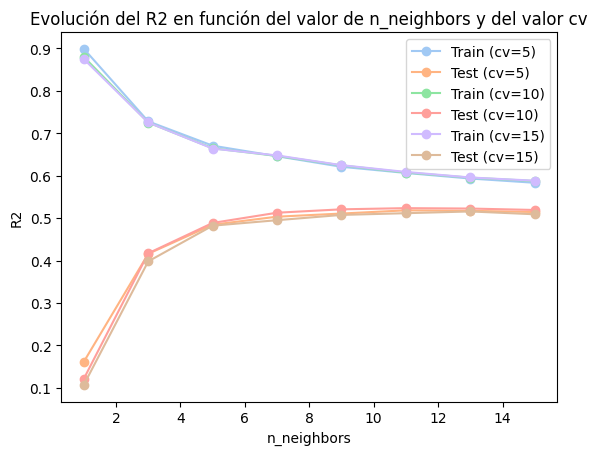

In [ ]:
# Graficamos los resultados de entrenamiento y prueba para cada valor de cv
for cv in cv_values:
    pyplot.plot(n_values, scores_dict[cv]['train'], '-o', label='Train (cv='+str(cv)+')')
    pyplot.plot(n_values, scores_dict[cv]['test'], '-o', label='Test (cv='+str(cv)+')')

pyplot.xlabel("n_neighbors")
pyplot.ylabel("R2")
pyplot.legend()
pyplot.title("Evolución del R2 en función del valor de n_neighbors y del valor cv")
pyplot.show()


In [ ]:
max_test_score, cv, n_neighbors = max((max(scores_dict[cv]['test']), cv, n_values[scores_dict[cv]['test'].index(max(scores_dict[cv]['test']))]) for cv in cv_values)

print(f"Según el algoritmo KNN Regression, el máximo valor de R2 en el conjunto de test es {max_test_score:.3f} con cv={cv} y n_neighbors={n_neighbors}.")


Según el algoritmo KNN Regression, el máximo valor de R2 en el conjunto de test es 0.524 con cv=10 y n_neighbors=11.


En este sentido, se observan los diferentes resultados de R2 para el algoritmo **KNN regression** en función de distintos valores tanto para 'cv' como para 'n_neighbors'.

Con ello, se puede concluir que, en general, los valores de R2 en el conjunto de prueba son similares para los diferentes valores de 'cv'. Sin embargo, sí que se observa una diferencia en los resultados de R2 según el valor de 'n_neighbors', de manera que para valores menores a 7, la métrica R2 es considerablemente menor. Así, el valor óptimo se obtiene para R2 igual a 0.524 para los valores de cv=10 y n_neighbors=11.

Finalmente, se implementa como último algoritmo **RandomForestRegressor**. Este algoritmo toma como parámetros el número de árboles o 'n_estimators', por lo que se prueba dicho algoritmo con este rango de valores en 'n_estimators': [10, 50, 100, 200, 300].

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Valores del parámetro n_estimators
n_estimators = [10, 50, 100, 200, 300]

# Definimos los diferentes valores de cv que queremos probar
cv_values = [5, 10, 15]

# Diccionario para almacenar los valores de entrenamiento y prueba para cada valor de cv y n_estimators
scores_dict = {}

# Evaluamos RandomForestRegressor para cada combinación de valores de cv y n_estimators
for cv in cv_values:
    train_scores = []
    test_scores = []
    for n in n_estimators:
        # Creamos el modelo
        model = RandomForestRegressor(n_estimators=n)

        # Realizamos la validación cruzada
        scores = cross_validate(model, x, y, cv=cv, scoring='r2', return_train_score=True)

        # Calculamos los promedios de las puntuaciones de entrenamiento y prueba para este valor de n_estimators
        train_score = np.mean(scores['train_score'])
        test_score = np.mean(scores['test_score'])
        train_scores.append(train_score)
        test_scores.append(test_score)

        # Imprimimos los resultados de esta iteración
        print("cv=", cv, ", n_estimators=", n, ", train_score=", round(train_score, 3), ", test_score=", round(test_score, 3))

    # Almacenamos los resultados de entrenamiento y prueba en el diccionario para este valor de cv
    scores_dict[cv] = {'train': train_scores, 'test': test_scores}


cv= 5 , n_estimators= 10 , train_score= 0.881 , test_score= 0.478
cv= 5 , n_estimators= 50 , train_score= 0.901 , test_score= 0.512
cv= 5 , n_estimators= 100 , train_score= 0.903 , test_score= 0.511
cv= 5 , n_estimators= 200 , train_score= 0.904 , test_score= 0.507
cv= 5 , n_estimators= 300 , train_score= 0.903 , test_score= 0.504
cv= 10 , n_estimators= 10 , train_score= 0.878 , test_score= 0.483
cv= 10 , n_estimators= 50 , train_score= 0.894 , test_score= 0.508
cv= 10 , n_estimators= 100 , train_score= 0.896 , test_score= 0.514
cv= 10 , n_estimators= 200 , train_score= 0.897 , test_score= 0.51
cv= 10 , n_estimators= 300 , train_score= 0.898 , test_score= 0.514
cv= 15 , n_estimators= 10 , train_score= 0.877 , test_score= 0.469
cv= 15 , n_estimators= 50 , train_score= 0.893 , test_score= 0.513
cv= 15 , n_estimators= 100 , train_score= 0.895 , test_score= 0.514
cv= 15 , n_estimators= 200 , train_score= 0.896 , test_score= 0.517
cv= 15 , n_estimators= 300 , train_score= 0.896 , test_score

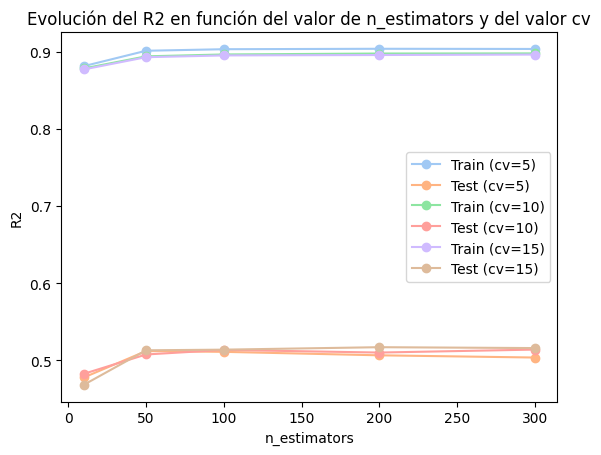

In [ ]:
# Graficamos los resultados de entrenamiento y prueba para cada valor de cv
for cv in cv_values:
    pyplot.plot(n_estimators, scores_dict[cv]['train'], '-o', label='Train (cv='+str(cv)+')')
    pyplot.plot(n_estimators, scores_dict[cv]['test'], '-o', label='Test (cv='+str(cv)+')')

pyplot.xlabel("n_estimators")
pyplot.ylabel("R2")
pyplot.legend()
pyplot.title("Evolución del R2 en función del valor de n_estimators y del valor cv")
pyplot.show()


In [ ]:
max_test_score, cv, n_estimators = max((max(scores_dict[cv]['test']), cv, n_estimators[scores_dict[cv]['test'].index(max(scores_dict[cv]['test']))]) for cv in cv_values)

print(f"Según el algoritmo RandomForestRegressor, el máximo valor de R2 en el conjunto de test es {max_test_score:.3f} con cv={cv} y n_estimators={n_estimators}.")


Según el algoritmo RandomForestRegressor, el máximo valor de R2 en el conjunto de test es 0.517 con cv=15 y n_estimators=200.


Una vez obtenidos los resultados del algoritmo **RandomForestRegressor**, se observa que el modelo mejora a medida que aumenta el valor de 'n_estimators'. No obstante, se aprecia una tendencia de estabilización del valor de R2 cuando 'n_estimators' alcanza el valor de 100.

Con todo ello, tras la comprobación de varios valores en los parámetros se obtiene que el máximo R2 en el conjunto de test es igual a 0.519 con cv igual a 15 y n_estimators igual a 100.

Finalmente, una vez se han implementado los modelos a comparar, se recopila la siguiente tabla:

| Algoritmos | Máximo R2 (test) |  R2 (train) |   k (cross validation) | max_depth | alpha | n_neighbors | n_estimators |
| ------------ | ------------ |------------ | ------------ |  ------------ | ------------ | ------------ |------------ |
| DecisionTreeRegressor | 0.487 | 0.524 | 5 |  4 | - | - | - |
| Ridge regression   |  0.438| 0.459  | 10 | - | 10 | - | - |
| KNN regressor   | 0.524  | 0.608 | 10 | - | - | 11 | - |
| RandomForestRegressor   | 0.519  | 0.895 | 15 | - | - | - | 100 |



La tabla anterior presenta los algoritmos de regresión implementados en el informe junto con su valor R2 máximo en el conjunto de test, su valor R2 de entrenamiento correspondiente y sus parámetros correspondientes.

Con todo ello, se puede observar que el modelo obtenido a partir del algoritmo **KNN regressor** es el que obtiene una métrica R2 en el conjunto de test mayor en comparación con los otros tres modelos, con un valor de 0.524. 

No obstante, es importante destacar que los resultados de los modelos implementados son relativamente bajos, lo que puede indicar que los modelos no han conseguido lograr una explicación completa de la varianza de los datos.

## Tarea de regresión (Label encoding)

In [ ]:
data_sum_ind = data_sum_ind.copy()
data_sum_ind

,year,month,day,Sum_ind,Latitude,Longitude,depth_strata (m),Island_encoded,Bioregion_encoded,Site_encoded,MPA_Status_encoded,PhylumOrDivision_encoded,Class_encoded,Order_encoded,Family_encoded,Subzone_name_encoded,epoca_encoded,ScientificName_encoded
0,2010,2.0,4.0,1,-1.34421,-89.66820,6.0,0,0,0,0,0,0,0,0,0,0,0
1,2010,2.0,4.0,203,-1.34421,-89.66820,6.0,0,0,0,0,0,0,1,1,0,0,1
2,2010,2.0,4.0,4,-1.34421,-89.66820,6.0,0,0,0,0,0,1,2,2,0,0,2
3,2010,2.0,4.0,45,-1.34421,-89.66820,6.0,0,0,0,0,0,0,3,3,0,0,3
4,2010,2.0,4.0,5,-1.34421,-89.66820,15.0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,2020,11.0,19.0,362,-0.28115,-90.56861,15.0,4,0,79,1,0,0,1,1,0,1,1
7021,2020,11.0,19.0,1,-0.28115,-90.56861,15.0,4,0,79,1,-1,-1,-1,-1,0,1,9
7022,2020,11.0,19.0,1,-0.28115,-90.56861,15.0,4,0,79,1,0,3,5,5,0,1,7
7023,2020,11.0,19.0,79,-0.28115,-90.56861,15.0,4,0,79,1,0,3,5,5,0,1,6


In [ ]:
from sklearn.utils import shuffle

X=data_sum_ind.drop('Sum_ind', axis=1)
y = data_sum_ind['Sum_ind']
X, y = shuffle(X, y, random_state=0)#np.log(y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd

def evaluate_modelo_reg(X, y,model):
    modelo = model
    metrics = ["r2", "neg_mean_absolute_error"]

    results = {"Feature Set": [], "Metric": [], "Score": []}

    for feature_set, features in X.items():
        cv_scores = cross_validate(modelo, features, y, cv=5, scoring=metrics, return_train_score=True,verbose=False)
        results["Feature Set"].extend([feature_set] * len(metrics) * 2)

        for metric in metrics:
            results["Metric"].append(f"{metric} Train (CV 1-5:)")
            results["Metric"].append(f"{metric} Test (CV 1-5:)")
            results["Score"].append(cv_scores['train_' + metric])
            results["Score"].append(cv_scores['test_' + metric])

    results_df = pd.DataFrame(results)
    return results_df

In [ ]:
def select_features_reg(data, feature_set):
    if feature_set == 'biologicas_sitio':
        features = ['Island_encoded', 'Bioregion_encoded', 'Site_encoded', 
                    'PhylumOrDivision_encoded', 'Class_encoded', 'Order_encoded', 'Family_encoded']
    elif feature_set == 'ubicacion_tiempo':
        features = ['year', 'month', 'epoca_encoded', 'Latitude', 'Longitude', 'depth_strata (m)']
    elif feature_set == 'todas':
        features = ['Island_encoded', 'Bioregion_encoded', 'Site_encoded', 
                    'PhylumOrDivision_encoded', 'Class_encoded', 'Order_encoded', 'Family_encoded',
                    'year', 'month', 'epoca_encoded', 'Latitude', 'Longitude', 'depth_strata (m)']
    else:
        raise ValueError("Conjunto de características no válido")

    return data[features]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_metric_by_feature(results_df, metric, feature_set):
    # Filtrar los datos para la métrica y conjunto de características específicos
    train_filtered_df = results_df[(results_df['Metric'] == f"{metric} Train (CV 1-5:)") & (results_df['Feature Set'] == feature_set)]
    test_filtered_df = results_df[(results_df['Metric'] == f"{metric} Test (CV 1-5:)") & (results_df['Feature Set'] == feature_set)]
    
    # Obtener los valores y puntuaciones de entrenamiento y prueba
    values = np.arange(1, 6)
    train_scores = np.array(train_filtered_df['Score'].tolist()).flatten().tolist()
    test_scores = np.array(test_filtered_df['Score'].tolist()).flatten().tolist()
    
    # Crear la gráfica
    plt.plot(values, train_scores, '-o', label='Train')
    plt.plot(values, test_scores, '-o', label='Test')
    plt.xlabel("Fold")
    plt.ylabel(metric)
    plt.legend()
    plt.title(f"Evolución de {metric} en función de los folds para {feature_set}")
    plt.show()


Se crean diferentes subconjuntos para determinar que caracteriticas influirian mas en la variable objetivo

In [ ]:
X = {
    "V. Todas": X,
    "V. biologicas y de region": select_features_reg(X, "biologicas_sitio"),
    "V. temporales y de ubicacion": select_features_reg(X, "ubicacion_tiempo"),
}


In [ ]:
from tabulate import tabulate
modelo_a_evaluar =  DecisionTreeRegressor(max_depth=4)
results_df = evaluate_modelo_reg(X, y,modelo_a_evaluar)
results_df['Score'] = results_df['Score'].apply(lambda x: [round(val, 2) for val in x])
table = tabulate(results_df, headers='keys', tablefmt='psql')
# Imprimir la tabla
print(table)

+----+------------------------------+-----------------------------------------+------------------------------------------+
|    | Feature Set                  | Metric                                  | Score                                    |
|----+------------------------------+-----------------------------------------+------------------------------------------|
|  0 | V. Todas                     | r2 Train (CV 1-5:)                      | [0.48, 0.48, 0.47, 0.52, 0.49]           |
|  1 | V. Todas                     | r2 Test (CV 1-5:)                       | [0.5, 0.49, 0.54, 0.37, 0.47]            |
|  2 | V. Todas                     | neg_mean_absolute_error Train (CV 1-5:) | [-43.11, -42.11, -44.34, -40.91, -43.75] |
|  3 | V. Todas                     | neg_mean_absolute_error Test (CV 1-5:)  | [-41.89, -47.15, -40.57, -48.85, -39.73] |
|  4 | V. biologicas y de region    | r2 Train (CV 1-5:)                      | [0.44, 0.45, 0.44, 0.49, 0.45]           |
|  5 | V. biolog

En base a los resultados se puede observar lo siguiente en base al subconjunto seleccionado y a la métrica R2:

V. Todas: En el caso de seleccionar todas las variables se obsrva que los valores de r2 en el entrenamiento se encuntran en el siguiente rango 0.47-0.52 y entre 0.37 y 0.54. esto significa que el lgoritmo no esta aprendiendo ni en el conjunto de entrenamiento ni en el de prueba


V. biologicas y de region: En este caso se obsrva que los valores de r2 en el entrenamiento se encuntran en el siguiente rango 0.44 - 0.49 y entre 0.36 y 0.52 en test. esto significa que el lgoritmo no esta aprendiendo ni en el conjunto de entrenamiento ni en el de prueba

V. temporales y de ubicacion: En este caso se obsrva que los valores de r2 en el entrenamiento se encuntran en el siguiente rango 0.03 - 0.04 y con valores similares en test. esto sugiere que este conjunto de variables tiene una capacidad nula de prediccion.

En Conclusion, respecto a la metrica R2, el conjunto de variables que ofrece los mejores resultados es "V. Todas". Sin embargo, cabe destacar que los valores son muy bajos por lo que este modelo no seria optimo para nuestro problema.

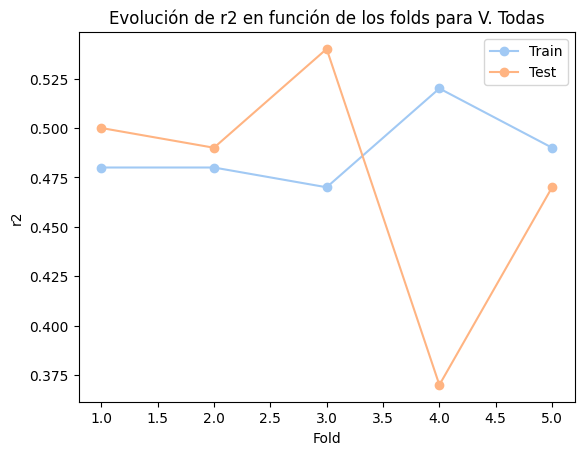

In [ ]:
metric = "r2"
feature_set = "V. Todas"
plot_metric_by_feature(results_df, metric, feature_set)

In [ ]:
from tabulate import tabulate
from sklearn.ensemble import RandomForestRegressor

modelo_a_evaluar =  RandomForestRegressor(n_estimators=200)
results_df = evaluate_modelo_reg(X, y,modelo_a_evaluar)
results_df['Score'] = results_df['Score'].apply(lambda x: [round(val, 2) for val in x])
table = tabulate(results_df, headers='keys', tablefmt='psql')
# Imprimir la tabla
print(table)

+----+------------------------------+-----------------------------------------+--------------------------------------------+
|    | Feature Set                  | Metric                                  | Score                                      |
|----+------------------------------+-----------------------------------------+--------------------------------------------|
|  0 | V. Todas                     | r2 Train (CV 1-5:)                      | [0.94, 0.94, 0.94, 0.94, 0.94]             |
|  1 | V. Todas                     | r2 Test (CV 1-5:)                       | [0.59, 0.56, 0.65, 0.52, 0.52]             |
|  2 | V. Todas                     | neg_mean_absolute_error Train (CV 1-5:) | [-13.76, -13.58, -14.29, -13.14, -13.85]   |
|  3 | V. Todas                     | neg_mean_absolute_error Test (CV 1-5:)  | [-36.0, -41.06, -32.27, -42.32, -35.41]    |
|  4 | V. biologicas y de region    | r2 Train (CV 1-5:)                      | [0.63, 0.64, 0.63, 0.67, 0.64]             |


En base a los resultados se puede observar lo siguiente en base al subconjunto seleccionado y a la métrica R2:

V. Todas: En el caso de seleccionar todas las variables se obsrva que los valores de r2 en el entrenamiento se encuntran en el siguiente rango 0.94 y entre 0.51 y 0.65. esto significa que el modelo estaria sobreajustado.


V. biologicas y de region: En este caso se obsrva que los valores de r2 en el entrenamiento se encuntran en el siguiente rango 0.63 y 0.67 y entre 0.43 y 0.55 en test. esto significa que el modelo no esta aprendiendo a predecir.

V. temporales y de ubicacion: En este caso se obsrva que los valores de r2 en el entrenamiento se encuntran en el siguiente rango  0.17 y 0.19 y con valores negativos en test. esto sugiere que este conjunto de variables tiene una capacidad nula de prediccion.

En Conclusion, respecto a la metrica R2, el conjunto de variables que ofrece los mejores resultados es "V. Todas". Sin embargo, cabe destacar que este modelo estaria sobreajustado.

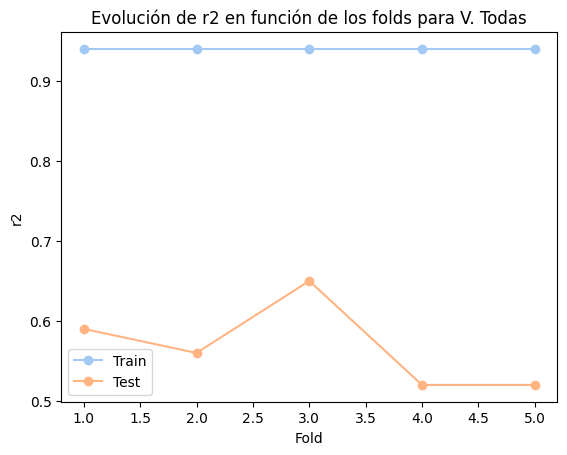

In [ ]:
metric = "r2"
feature_set = "V. Todas"
plot_metric_by_feature(results_df, metric, feature_set)

In [ ]:
from sklearn.neural_network import MLPRegressor

modelo_a_evaluar = MLPRegressor(hidden_layer_sizes=(10,10))

results_df = evaluate_modelo_reg(X, y,modelo_a_evaluar)
results_df['Score'] = results_df['Score'].apply(lambda x: [round(val, 2) for val in x])
table = tabulate(results_df, headers='keys', tablefmt='psql')
# Imprimir la tabla
print(table)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum

+----+------------------------------+-----------------------------------------+------------------------------------------+
|    | Feature Set                  | Metric                                  | Score                                    |
|----+------------------------------+-----------------------------------------+------------------------------------------|
|  0 | V. Todas                     | r2 Train (CV 1-5:)                      | [0.14, 0.27, 0.13, 0.15, 0.12]           |
|  1 | V. Todas                     | r2 Test (CV 1-5:)                       | [0.14, 0.27, 0.15, 0.12, 0.1]            |
|  2 | V. Todas                     | neg_mean_absolute_error Train (CV 1-5:) | [-80.85, -58.62, -85.78, -79.41, -91.71] |
|  3 | V. Todas                     | neg_mean_absolute_error Test (CV 1-5:)  | [-80.75, -64.13, -79.8, -87.35, -85.4]   |
|  4 | V. biologicas y de region    | r2 Train (CV 1-5:)                      | [0.41, 0.43, 0.39, 0.46, 0.4]            |
|  5 | V. biolog

En base a los resultados se puede observar lo siguiente en base al subconjunto seleccionado y a la métrica R2:

V. Todas: En el caso de seleccionar todas las variables se obsrva que los valores de r2 en el entrenamiento se encuntran en el siguiente rango 0.26 y 0.31 y entre 0.23 y 0.35. esto significa que el modelo no aprende a predecir.

V. biologicas y de region: En este caso se obsrva que los valores de r2 en el entrenamiento se encuntran en el siguiente rango 0.29 y 0.48 y entre  0.32 y 0.43. en test. esto significa que el modelo no esta aprendiendo a predecir.

V. temporales y de ubicacion: En este caso se obsrva que los valores de r2 en el entrenamiento y test son 0. esto sugiere que este conjunto de variables tiene una capacidad nula de prediccion.

En Conclusion, respecto a la metrica R2, ninguna combinacion ofrece resultados optimos.

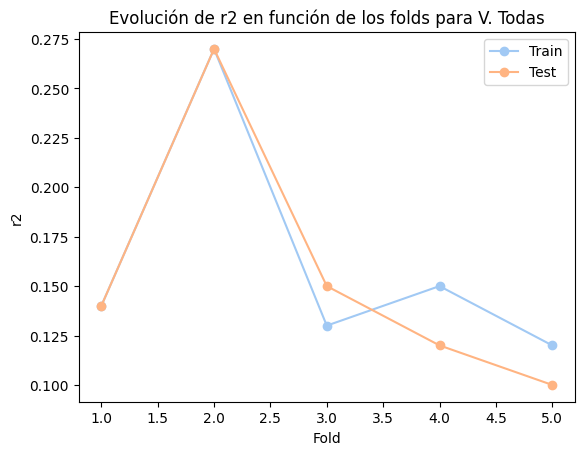

In [ ]:
metric = "r2"
feature_set = "V. Todas"
plot_metric_by_feature(results_df, metric, feature_set)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import MeanAbsoluteError, MeanSquaredError, RootMeanSquaredError
from sklearn.metrics import r2_score

x=data_sum_ind.drop('Sum_ind', axis=1)
y2 = data_sum_ind['Sum_ind']
# 70% de los datos para el train y el 30% de los datos para el test
x_train, x_test, y_train, y_test = train_test_split(x, y2, test_size=0.3, random_state=1)
# tamaño y forma de los conjuntos de entrenamiento y test para 'x' e 'y'
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=[MeanAbsoluteError(), MeanSquaredError()])
model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)

# Evaluate the model
loss, mae, mse = model.evaluate(x_test, y_test)
print(f'Test MAE: {mae}, Test MSE: {mse}')

# Calculate R2 score
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f'Test R2 score: {r2}')

(4816, 17) (2064, 17) (4816,) (2064,)
65/65 [==============================] - 0s 2ms/step - loss: 18271.3906 - mean_absolute_error: 57.5476 - mean_squared_error: 18271.3906
Test MAE: 57.547611236572266, Test MSE: 18271.390625
65/65 [==============================] - 0s 1ms/step
Test R2 score: 0.2808418324953058


In [ ]:
from xgboost import XGBRegressor

modelo_a_evaluar = XGBRegressor()

results_df = evaluate_modelo_reg(X, y,modelo_a_evaluar)
results_df['Score'] = results_df['Score'].apply(lambda x: [round(val, 2) for val in x])
table = tabulate(results_df, headers='keys', tablefmt='psql')
# Imprimir la tabla
print(table)

+----+------------------------------+-----------------------------------------+--------------------------------------------+
|    | Feature Set                  | Metric                                  | Score                                      |
|----+------------------------------+-----------------------------------------+--------------------------------------------|
|  0 | V. Todas                     | r2 Train (CV 1-5:)                      | [0.93, 0.93, 0.92, 0.93, 0.94]             |
|  1 | V. Todas                     | r2 Test (CV 1-5:)                       | [0.61, 0.56, 0.62, 0.49, 0.45]             |
|  2 | V. Todas                     | neg_mean_absolute_error Train (CV 1-5:) | [-19.05, -19.07, -20.68, -19.19, -18.84]   |
|  3 | V. Todas                     | neg_mean_absolute_error Test (CV 1-5:)  | [-40.51, -46.08, -37.33, -46.53, -40.29]   |
|  4 | V. biologicas y de region    | r2 Train (CV 1-5:)                      | [0.64, 0.64, 0.63, 0.67, 0.64]             |


En base a los resultados se puede observar lo siguiente en base al subconjunto seleccionado y a la métrica R2:

V. Todas: En el caso de seleccionar todas las variables se obsrva que los valores de r2 en el entrenamiento se encuntran en el siguiente rango 0.93 y 0.94 y entre 0..41 y 0.6. esto significa que el modelo esta sobreajustado.

V. biologicas y de region: En este caso se obsrva que los valores de r2 en el entrenamiento se encuntran en el siguiente rango 0.63 y 0.67 y entre  0.43 y 0.55 . en test. esto significa que el modelo esta sobreajustado.

V. temporales y de ubicacion: En este caso se obsrva que los valores de r2 en el entrenamiento y test son bajos. esto sugiere que este conjunto de variables tiene una capacidad nula de prediccion.

En Conclusion, respecto a la metrica R2, las dos primeras combinaciones ofrecen resultados buenos en el entrreanmiento pero bajos en test por lo que estaria el modelo sobreajustado.

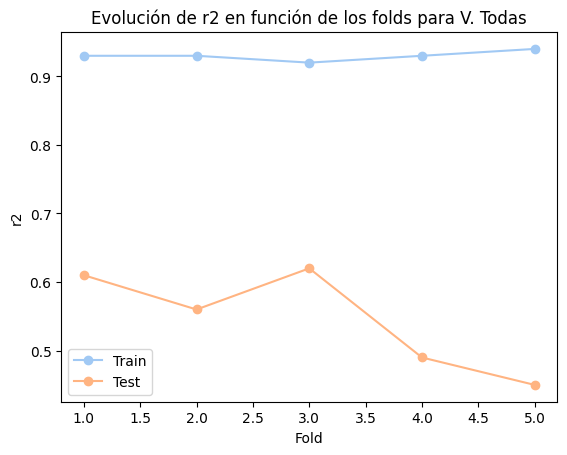

In [ ]:
metric = "r2"
feature_set = "V. Todas"
plot_metric_by_feature(results_df, metric, feature_set)

## Tarea de clasificación

En este caso se ha seleccionado MPA_Status el cual representa el estado de la zona marina protegida, es decir el estado de conservación de la zona en la que se recogieron los datos. Est analisis predictivo tiene como objetivo en primera instancia el determinar de que caracteristicas depende el estado marcado de la zona protegida lo que permitiria en un futuro en base a esas caracteristicas poder predecir el estado de la zona protegida.

Para ello en primer lugar se realizara un analisis de deteccion de patrones para determinar la corelación entre la variable objetivo y diferentes posibles combinaciones de caracteristicas. Con esto se conseguira determinar que caracteristicas maximizarian la predicción. En primera lugar podriamos estudiar las siguientes características:

year y month: El año podrían tener un impacto en 'MPA_Status' debido a las variaciones en el tiempo de las políticas de conservación, las condiciones climáticas, etc. 

Sum_ind: Esta característica representa el cantidad de organismos individuales y podría tener relacion con la variable a predecir. 

Latitude y Longitude: La ubicación podria ser un factor importante en cuanto a la relevancia geografica en determinado estado de conservación. 

depth_strata: La profundidad podría ser condicionante. 

Island_encoded, Bioregion_encoded, Site_encoded': cada una de las islas/bioregiones o el sitio pueden tener diferentes condiciones y políticas que afecten a la variable objetivo. 

PhylumOrDivision_encoded, Class_encoded, Order_encoded, Family_encoded, ScientificName_encoded: los datos relacionados con la taxonomía de las especies podrían ser determinantes ya que representarian la biodiversidad un factor relevante en el estado de conservación. 

epoca_encoded: La época del año podría afectar el estado de conservación.

Ahora que se tiene una vision global de las diferentes caracteristicas se podria realizar un analisis mas minuciosos. Para ello comenzaremos con un analisis que detecte cualquier correlacion lineal ademas de un analisis de agrupamiento mediante cluster para poder determinar otro tipo de relaciones no lineales. Una vez hecho esto ya se podrian seleccionar determinados grupos de caracteristicas para el analisis predictivo.

In [ ]:
# Se crea una copia del Dataframe original
data_mpa = data_sum_ind.copy()

In [ ]:
data_mpa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6880 entries, 0 to 7024
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      6880 non-null   int64  
 1   month                     6880 non-null   float64
 2   day                       6880 non-null   float64
 3   Sum_ind                   6880 non-null   int64  
 4   Latitude                  6880 non-null   float64
 5   Longitude                 6880 non-null   float64
 6   depth_strata (m)          6880 non-null   float64
 7   Island_encoded            6880 non-null   int64  
 8   Bioregion_encoded         6880 non-null   int64  
 9   Site_encoded              6880 non-null   int64  
 10  MPA_Status_encoded        6880 non-null   int64  
 11  PhylumOrDivision_encoded  6880 non-null   int64  
 12  Class_encoded             6880 non-null   int64  
 13  Order_encoded             6880 non-null   int64  
 14  Family_e

identificar relaciones entre variables

In [ ]:
correlation_matrix = data_mpa.corr()
#print(correlation_matrix)


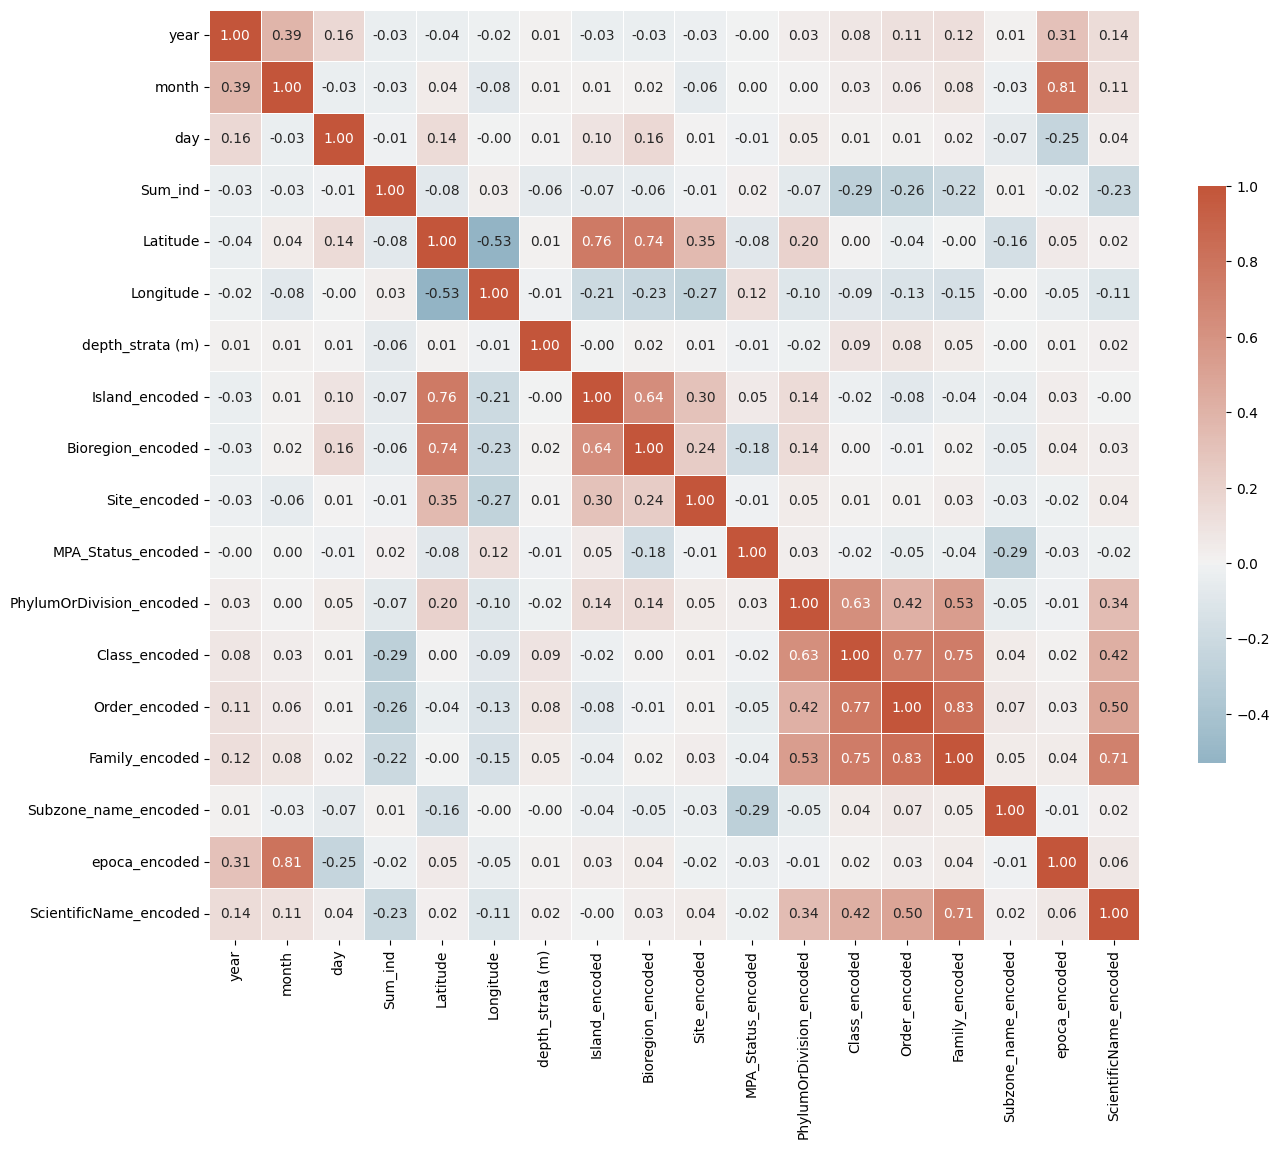

In [ ]:
import seaborn as sns

#mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(15, 15))  # ajusta el tamaño de la figura para que sea lo suficientemente grande
sns.heatmap(correlation_matrix, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.show()

artiendo de los resultados obtenidos, podemos observar que la columna que estamos tratando de predecir, MPA_Status_encoded, no tiene una correlación fuerte con las demás variables, lo que supondría que podría ser más difícil predecir MPA_Status_encoded utilizando solo estas variables, además de que la relación entre MPA_Status_encoded y las demás variables no sean lineales, por lo que una matriz de correlación no lo podría capturaría. 

Pese a lo anterior, algunas correlaciones que podemos destacar son las siguientes:

Subzone_name_encoded: Esta variable tiene una correlación negativa moderada (-0.287574) con MPA_Status_encoded. Esta correlación sugiere que la subzona puede tener cierto efecto en el estado de MPA, aunque esta relación es inversa.

Island_encoded: Esta variable muestra una correlación débil (0.052732) con MPA_Status_encoded, aunque podría aportar información útil. Bioregion_encoded una correlación negativa.

Bioregion_encoded: Al igual que Island_encoded, esta variable muestra una correlación moderada débil (-0.175128), aun así, podría aportar información útil al análisis.

Longitude: Esta variable tiene una correlación moderada positiva (0.121003) con MPA_Status_encoded. Aunque la correlación no sea muy fuerte, podría aportar alguna relación útil aquí para la predicción.

Como conclusión cabe destacar que la correlación puede indicar una relación potencial entre dos variables, pero no implica causalidad y la matriz de correlación sólo nos permite analizar relaciones lineales. Para relaciones no lineales o interacciones entre variables, podríamos requerir análisis adicionales y/o modelos más complejos.

In [ ]:
features = ['year', 'month', 'Sum_ind', 'Latitude', 'Longitude', 'depth_strata (m)', 
            'Island_encoded', 'Bioregion_encoded', 'Site_encoded', 
            'PhylumOrDivision_encoded', 'Class_encoded', 'Order_encoded', 'Family_encoded', 
            'ScientificName_encoded', 'Subzone_name_encoded', 'epoca_encoded']
X = data_mpa[features]
y = data_mpa['MPA_Status_encoded']



 Analizando las variables: ['Latitude', 'Longitude', 'depth_strata (m)']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



MPA_Status_encoded    0    1
Cluster                     
0                   396  376
1                   900  800
2                   566  799
3                   888  792
4                   541  822


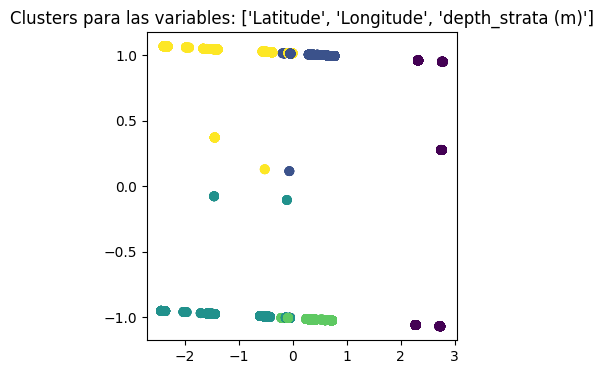


 Analizando las variables: ['year', 'month', 'epoca_encoded']
MPA_Status_encoded     0     1
Cluster                       
0                    416   467
1                   1611  1739
2                    356   268
3                    450   596
4                    458   519


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



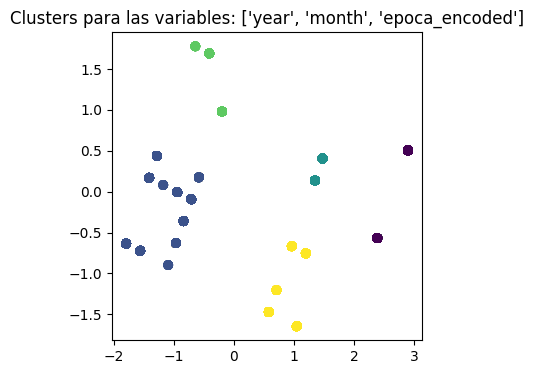


 Analizando las variables: ['PhylumOrDivision_encoded', 'Class_encoded', 'Order_encoded', 'Family_encoded']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



MPA_Status_encoded     0     1
Cluster                       
0                   1441  1695
1                   1156  1079
2                    226   298
3                    275   213
4                    193   304


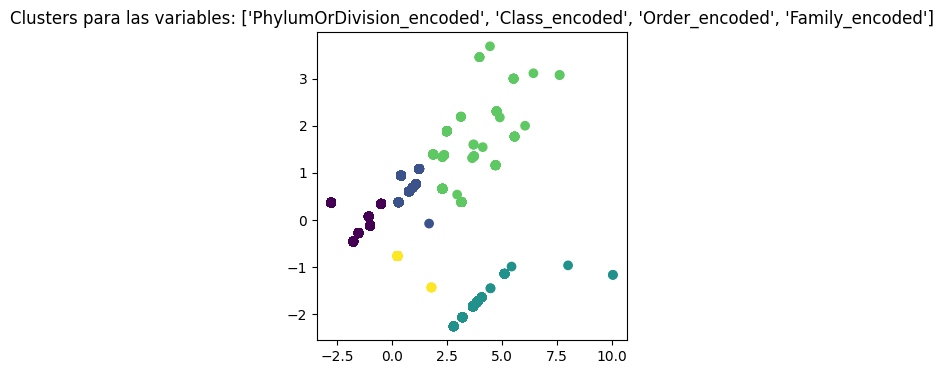


 Analizando las variables: ['Island_encoded', 'Bioregion_encoded', 'Site_encoded']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



MPA_Status_encoded    0     1
Cluster                      
0                   970  1028
1                   756   882
2                   788   771
3                   474   757
4                   303   151


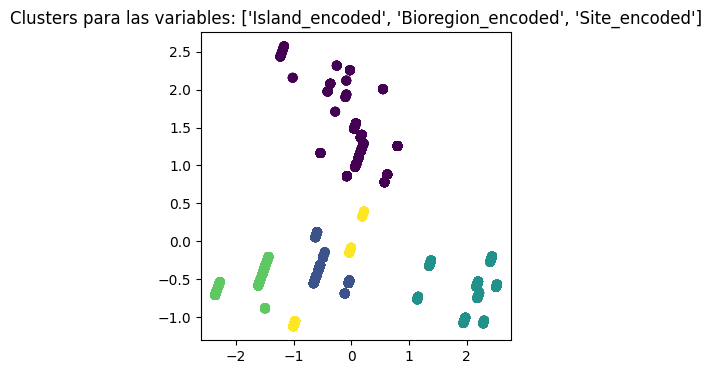

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import itertools
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

combinaciones = [
    ['Latitude', 'Longitude', 'depth_strata (m)'],
    ['year', 'month', 'epoca_encoded'],
    ['PhylumOrDivision_encoded', 'Class_encoded', 'Order_encoded', 'Family_encoded'],
    ['Island_encoded', 'Bioregion_encoded', 'Site_encoded'],
]

scaler = StandardScaler()

for combinacion in combinaciones:
    print(f"\n Analizando las variables: {combinacion}")

    X = pd.DataFrame(scaler.fit_transform(data_mpa[combinacion]), columns=combinacion)
    y = data_mpa['MPA_Status_encoded']
    kmeans = KMeans(n_clusters=5, random_state=42)
    kmeans.fit(X)

    data_mpa['Cluster'] = kmeans.labels_
    tabla_contingencia = pd.crosstab(data_mpa['Cluster'], y)
    print(tabla_contingencia)

    if len(combinacion) > 1:
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(X)
        data_mpa['PCA1'] = pca_result[:,0]
        data_mpa['PCA2'] = pca_result[:,1]

        plt.figure(figsize=(4,4))
        plt.scatter(data_mpa['PCA1'], data_mpa['PCA2'], c=data_mpa['Cluster'])
        plt.title(f'Clusters para las variables: {combinacion}')
        plt.show()
    else:
        print("No se puede aplicar PCA")


Según los resultados que hemos obtenido, podemos observar que la elección de variables influye en cómo se forman los clusters además de como se distribuye el 'MPA_Status_Encoded' dentro de cada cluster. Para nuestro análisis hemos hecho las siguientes combinaciones:

Combinación 1: ['Latitude', 'Longitude', 'depth_strata (m)']

Esta agrupación se basa en los datos geográficos de longitud, latitud y la profundidad. Se puede observar que la distribución de ' MPA_Status_Encoded ' está bastante equilibrada en la mayoría de los clusters, sin embargo, podemos observar que el cluster 1 tiene más áreas marinas protegidas con estado "0" y los clusters 2 y 3 tienen más áreas marinas protegidas con estado "1", esto podría sugerir que ciertas áreas geográficas o ciertos niveles de profundidad pueden estar más o menos relacionados con diferentes estados de áreas marinas protegidas.
 
Combinación 2: ['year', 'month', 'epoca_encoded']

Esta segunda agrupación se basa en los datos temporales. En este caso, se puede observar que el cluster 1 tiene un número significativamente mayor de observaciones, esto podría indicar que hay ciertos periodos de tiempo que tienen un alto número de observaciones y, por otra parte, el cluster 2 tiene una proporción mayor de "0", lo que podría sugerir que, en ciertos periodos de tiempo, es más probable que las áreas marinas protegidas tengan un estado "0".

Combinación 3: ['PhylumOrDivision_encoded', 'Class_encoded', 'Order_encoded', 'Family_encoded']

Esta agrupación se basa en las características biológicas de las áreas marinas protegidas, podemos observar que el cluster 1 vuelve a tener un número significativamente mayor de observaciones, lo que podría suponer que hay ciertos grupos taxonómicos que son más comunes en las áreas marinas protegidas, por otra parte, los clusters 2, 3 y 4 tienen una distribución equilibrada de 'MPA_Status', mientras que el cluster 0 tiende a tener más 'MPA_Status' con estado "1". Esto podría sugerir que ciertos grupos taxonómicos pueden estar más asociados con un estado particular de las áreas marinas protegidas.

Combinación 4: ['Island_encoded', 'Bioregion_encoded', 'Site_encoded']

Esta última agrupación se basa en la ubicación específica de las áreas marinas protegidas. La distribución de 'MPA_Status' está equilibrada en los clusters 0, 1 y 2, sin embargo, el cluster 3 tiene una proporción ligeramente mayor de "1", y por otro lado el cluster 4 tiene una proporción bastante mayor de "0". Esto podría sugerir que ciertas ubicaciones específicas pueden estar más asociadas con un estado particular de áreas marinas protegidas.


Ahora bien, para poder realizar el analisis predictivo y en base al analisis anterior se puede deducir que con las variables biológicas y de sitio se observa una separación significativa en los clusters, lo que sugiere que estas variables pueden ser útiles para la predicción. Cabe destacar que los clusters se diferenciaban en este caso principalmente en el número de observaciones y no en la proporción del MPA_Status. Esta variabilidad en los clusters podria indicar que diferentes grupos de especies podrían estar relacionadas con diferentes estados de las MPA. Una posible respuesta podría relcionarse con factores ecológicos, como la diversidad de especies, caracteristicas del habitat que podrian influir en las decisiones sobre la protección de las áreas marinas.
En cuanto a las variables relacionadas con la ubicación y el tiempo, se puede observar separacion entre los cluster pero no muy marcada como en el caso anterior. Esto no quiere decir que no estas variables no influyan en el resultado.



dado ambos analisis tanto el de la matriz de correlacion como la clusterizacion y a la hora de seleccionar un modelo de prediccion y entrenarlo, se podrian considerar todas las variables mencionadas. auque dicho esto, se probará con diferentes combianciones y asi poder concluir que diferentes caracteristicas influyen en la variable objetivo.


Analisis predictivo

In [ ]:

def select_features(data, feature_set):
    if feature_set == 'biologicas_sitio':
        features = ['Island_encoded', 'Bioregion_encoded', 'Site_encoded', 
                    'PhylumOrDivision_encoded', 'Class_encoded', 'Order_encoded', 'Family_encoded']
    elif feature_set == 'ubicacion_tiempo':
        features = ['year', 'month', 'epoca_encoded', 'Latitude', 'Longitude', 'depth_strata (m)']
    elif feature_set == 'todas':
        features = ['Island_encoded', 'Bioregion_encoded', 'Site_encoded', 
                    'PhylumOrDivision_encoded', 'Class_encoded', 'Order_encoded', 'Family_encoded',
                    'year', 'month', 'epoca_encoded', 'Latitude', 'Longitude', 'depth_strata (m)']
    else:
        raise ValueError("Conjunto de características no válido")

    return data[features]

# Seleccionar las características deseadas
#X_biologicas_sitio = select_features(data_mpa, 'biologicas_sitio')
#X_ubicacion_tiempo = select_features(data_mpa, 'ubicacion_tiempo')
#X_todas = select_features(data_mpa, 'todas')



In [ ]:
# Variable objetivo
X=select_features(data_mpa, 'todas')
y = data_mpa['MPA_Status_encoded']
#X, y = shuffle(X, y, random_state=0)#np.log(y)
scaler = StandardScaler()
#X = scaler.fit_transform(X)

MODELOS

DT

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd

def evaluate_decision_tree(X, y,model):
    #X, y = shuffle(X, y, random_state=0)
    modelo = model
    metrics = ["accuracy", "f1_macro"]

    results = {"Feature Set": [], "Metric": [], "Score": []}

    for feature_set, features in X.items():
        #features, y = shuffle(features, y, random_state=0)
        cv_scores = cross_validate(modelo, features, y, cv=5, scoring=metrics, return_train_score=True,verbose=False)
        results["Feature Set"].extend([feature_set] * len(metrics) * 2)

        for metric in metrics:
            results["Metric"].append(f"{metric} Train (CV 1-5:)")
            results["Metric"].append(f"{metric} Test (CV 1-5:)")
            results["Score"].append(cv_scores['train_' + metric])
            results["Score"].append(cv_scores['test_' + metric])

    results_df = pd.DataFrame(results)
    return results_df


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_metric_by_feature(results_df, metric, feature_set):
    # Filtrar los datos para la métrica y conjunto de características específicos
    train_filtered_df = results_df[(results_df['Metric'] == f"{metric} Train (CV 1-5:)") & (results_df['Feature Set'] == feature_set)]
    test_filtered_df = results_df[(results_df['Metric'] == f"{metric} Test (CV 1-5:)") & (results_df['Feature Set'] == feature_set)]
    
    # Obtener los valores y puntuaciones de entrenamiento y prueba
    values = np.arange(1, 6)
    train_scores = np.array(train_filtered_df['Score'].tolist()).flatten().tolist()
    test_scores = np.array(test_filtered_df['Score'].tolist()).flatten().tolist()
    
    # Crear la gráfica
    plt.plot(values, train_scores, '-o', label='Train')
    plt.plot(values, test_scores, '-o', label='Test')
    plt.xlabel("Fold")
    plt.ylabel(metric)
    plt.legend()
    plt.title(f"Evolución de {metric} en función de los folds para {feature_set}")
    plt.show()


In [ ]:
variable_a_analizar = 'MPA_Status_encoded'

X = {
    "V. biologicas y de region": select_features(data_mpa, "biologicas_sitio"),
    "V. temporales y de ubicacion": select_features(data_mpa, "ubicacion_tiempo"),
    "V. Todas": select_features(data_mpa, "todas")
}

y = data_mpa[variable_a_analizar]
#svc_clf = KNeighborsClassifier(n_neighbors=3)
#model = SVC()
#dt_clf = DecisionTreeClassifier(random_state=42)


En Primer lugar se crean varios subconjuntos tal y como se ha mencionado anteriormente. Para el analisis predictivo se seleccionar los siguientes algorritmos: KNN,DT, SVC, y algortmos de Ensambling. 

Para cada uno de ellos se probaran diferentes combinaciones de parametros para asi obtener el resultado optimo. Una vez hecho esto se realizar un analisis comparativo entre ellos para determinar cual obtiene mejores resultados.

KNN

In [ ]:

from tabulate import tabulate
modelo_a_evaluar =  KNeighborsClassifier(n_neighbors=3)
results_df = evaluate_decision_tree(X, y,modelo_a_evaluar)
results_df['Score'] = results_df['Score'].apply(lambda x: [round(val, 2) for val in x])
table = tabulate(results_df, headers='keys', tablefmt='psql')
# Imprimir la tabla
print(table)


+----+------------------------------+--------------------------+--------------------------------+
|    | Feature Set                  | Metric                   | Score                          |
|----+------------------------------+--------------------------+--------------------------------|
|  0 | V. biologicas y de region    | accuracy Train (CV 1-5:) | [0.98, 0.98, 0.98, 0.98, 0.98] |
|  1 | V. biologicas y de region    | accuracy Test (CV 1-5:)  | [0.93, 0.96, 0.93, 0.97, 0.92] |
|  2 | V. biologicas y de region    | f1_macro Train (CV 1-5:) | [0.98, 0.98, 0.98, 0.98, 0.98] |
|  3 | V. biologicas y de region    | f1_macro Test (CV 1-5:)  | [0.93, 0.96, 0.92, 0.97, 0.92] |
|  4 | V. temporales y de ubicacion | accuracy Train (CV 1-5:) | [1.0, 1.0, 1.0, 1.0, 1.0]      |
|  5 | V. temporales y de ubicacion | accuracy Test (CV 1-5:)  | [0.61, 0.72, 0.6, 0.75, 0.66]  |
|  6 | V. temporales y de ubicacion | f1_macro Train (CV 1-5:) | [1.0, 1.0, 1.0, 1.0, 1.0]      |
|  7 | V. temporales

Partiendo de los resultados obtenidos del algoritmo KNN, podemos observar que las diferentes combinaciones de variables dan resultados variados, según la métrica de precisión.

Variables Biológicas y de Región: Los valores de accuracy obtenidos sobre el conjunto de entrenamiento son bastante altos, con un promedio de 0.98. Por otra parte, en el conjunto de test, los valores son generalmente buenos, aunque muestran una variabilidad más grande que va desde 0.92 hasta 0.97.

Variables Temporales y de Ubicación: Esta combinación de variables da lugar a un modelo con resultados perfectos sobre el conjunto de entrenamiento, con una precisión de 1.0, sin embargo, el accuracy en los en el conjunto de test, es bastante más baja, con resultados entre 0.61 y 0.75, por lo que podemos suponer que es un indicio de sobreajuste, ya que el modelo se desempeña perfectamente en el conjunto de entrenamiento, pero no llega a generalizar a nuevos datos.

Todas las Variables: En este caso, el accuracy es menor tanto para el entrenamiento como para la prueba en comparación con las otras dos combinaciones de variables. Los valores de accuracy para el conjunto de entrenamiento varían de 0.90 a 0.91, mientras que para el conjunto de test da resultados entre 0.71 y 0.79. Aunque los valores de accuracy son más bajos, la brecha entre los resultados de los conjuntos de  entrenamiento y test es más pequeña que la combinación anterior, lo que sugiere que este modelo puede estar menos sobreajustado.

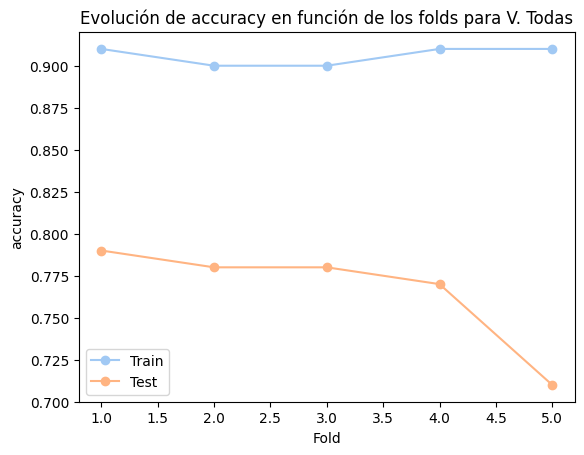

In [ ]:
metric = "accuracy"
feature_set = "V. Todas"
plot_metric_by_feature(results_df, metric, feature_set)

DT

In [ ]:

from tabulate import tabulate
modelo_a_evaluar =  DecisionTreeClassifier(random_state=42)
results_df = evaluate_decision_tree(X, y,modelo_a_evaluar)
results_df['Score'] = results_df['Score'].apply(lambda x: [round(val, 2) for val in x])
table = tabulate(results_df, headers='keys', tablefmt='psql')
# Imprimir la tabla
print(table)


+----+------------------------------+--------------------------+-------------------------------+
|    | Feature Set                  | Metric                   | Score                         |
|----+------------------------------+--------------------------+-------------------------------|
|  0 | V. biologicas y de region    | accuracy Train (CV 1-5:) | [1.0, 1.0, 1.0, 1.0, 1.0]     |
|  1 | V. biologicas y de region    | accuracy Test (CV 1-5:)  | [0.97, 0.99, 0.97, 1.0, 1.0]  |
|  2 | V. biologicas y de region    | f1_macro Train (CV 1-5:) | [1.0, 1.0, 1.0, 1.0, 1.0]     |
|  3 | V. biologicas y de region    | f1_macro Test (CV 1-5:)  | [0.97, 0.99, 0.97, 1.0, 1.0]  |
|  4 | V. temporales y de ubicacion | accuracy Train (CV 1-5:) | [1.0, 1.0, 1.0, 1.0, 1.0]     |
|  5 | V. temporales y de ubicacion | accuracy Test (CV 1-5:)  | [0.98, 0.99, 0.97, 1.0, 1.0]  |
|  6 | V. temporales y de ubicacion | f1_macro Train (CV 1-5:) | [1.0, 1.0, 1.0, 1.0, 1.0]     |
|  7 | V. temporales y de ubic

Partiendo de los resultados obtenidos del algoritmo decision tree, podemos observar que las diferentes combinaciones de variables resultados más uniformes que el algoritmo anterior de KNN, según la métrica de precisión.

Variables Biológicas y de Región: Los valores de accuracy obtenidos sobre el conjunto de entrenamiento perfectos, con un promedio de 1.00. En el conjunto de test, los valores son bastante buenos también, con un promedio de 0.98. Como podemos observar, este modelo se ajusta bastante bien a los conjuntos y generaliza bastante bien también.

Variables Temporales y de Ubicación: Con esta combinación obtenemos un modelo que también se ajusta a la perfección a los datos del conjunto de entrenamiento, con un promedio de 1.0. y al igual que el conjunto anterior, obtiene unos resultados rozando la perfección en el conjunto de test, con un promedio de 0.99 . Al igual que la combinación anterior también podemos concluir que el modelo generaliza bastante bien.

Todas las Variables: Con esta combinación obtenemos un modelo que también se ajusta a la perfección a los datos del conjunto de entrenamiento, con un promedio de 1.0. y al igual que los conjunto anterior, obtiene unos resultados rozando bastante buenos en el conjunto de test, con un promedio de 0.98 . Al igual que las 2 combinaciones anteriores, también podemos concluir que el modelo generaliza bastante bien.

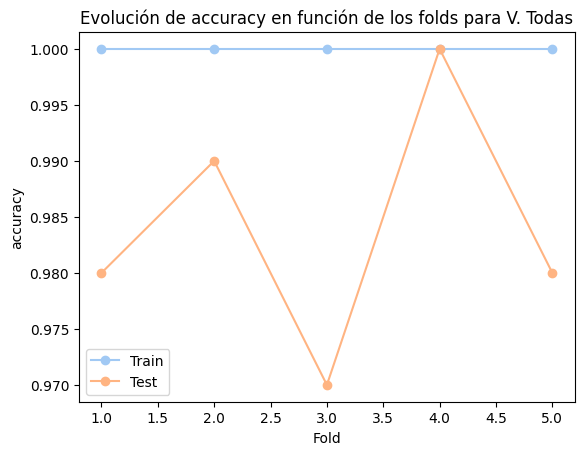

In [ ]:
metric = "accuracy"
feature_set = "V. Todas"
plot_metric_by_feature(results_df, metric, feature_set)

Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

from tabulate import tabulate
modelo_a_evaluar =  BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=4), 
    n_estimators=100, 
    max_samples=0.5, max_features=0.5,
    bootstrap=True, # Se realiza muestreo con reemplazo
    n_jobs=-1 # Usar todos los núcleos de la CPU para entrenamiento
)
results_df = evaluate_decision_tree(X, y,modelo_a_evaluar)
results_df['Score'] = results_df['Score'].apply(lambda x: [round(val, 2) for val in x])
table = tabulate(results_df, headers='keys', tablefmt='psql')
# Imprimir la tabla
print(table)


+----+------------------------------+--------------------------+--------------------------------+
|    | Feature Set                  | Metric                   | Score                          |
|----+------------------------------+--------------------------+--------------------------------|
|  0 | V. biologicas y de region    | accuracy Train (CV 1-5:) | [0.81, 0.83, 0.78, 0.82, 0.8]  |
|  1 | V. biologicas y de region    | accuracy Test (CV 1-5:)  | [0.77, 0.83, 0.7, 0.81, 0.83]  |
|  2 | V. biologicas y de region    | f1_macro Train (CV 1-5:) | [0.8, 0.82, 0.77, 0.82, 0.8]   |
|  3 | V. biologicas y de region    | f1_macro Test (CV 1-5:)  | [0.76, 0.83, 0.69, 0.81, 0.83] |
|  4 | V. temporales y de ubicacion | accuracy Train (CV 1-5:) | [0.98, 0.99, 0.91, 0.98, 0.89] |
|  5 | V. temporales y de ubicacion | accuracy Test (CV 1-5:)  | [0.91, 0.99, 0.87, 0.99, 0.87] |
|  6 | V. temporales y de ubicacion | f1_macro Train (CV 1-5:) | [0.98, 0.99, 0.91, 0.98, 0.89] |
|  7 | V. temporales

Partiendo de los resultados obtenidos usando bagging con estimador de decision tree.

Variables Biológicas y de Región: Los valores de accuracy obtenidos sobre el conjunto de entrenamiento son notablemente menores que los resultados obtenidos con KNN y decisión tree, con un promedio de 0.80. En el conjunto de test, los valores obtenidos son parecidos, con un promedio de 0.81. Podemos observar que este modelo no llega a ajustarse del todo bien al conjunto.

Variables Temporales y de Ubicación: Con esta combinación obtenemos un modelo que también se ajusta bastante bien a los datos del conjunto de entrenamiento, con un promedio de 0.95. En el conjunto de test, se obtienen unos resultados rozando bastante buenos también, con un promedio de 0.92 . Con esta combinación podemos observar que el modelo generaliza bastante bien.

Todas las Variables: Con esta combinación obtenemos un modelo que también se ajusta muy bien a los datos del conjunto de entrenamiento, con un promedio de 0.97. Y al igual que la combinación anterior, obtiene unos resultados bastante buenos en el conjunto de test, con un promedio de 0.95. Al igual que la combinación anterior, también podemos concluir que el modelo generaliza bastante bien.

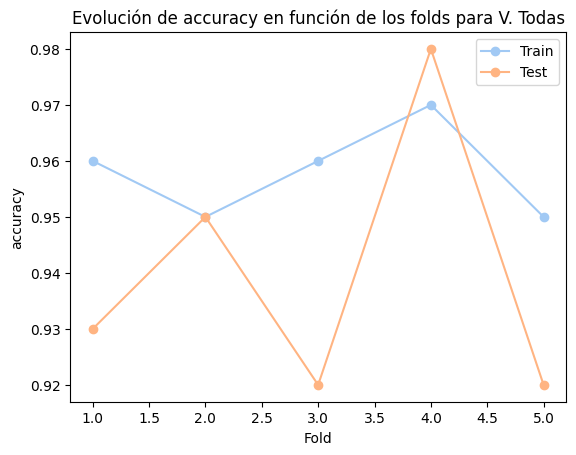

In [ ]:
metric = "accuracy"
feature_set = "V. Todas"
plot_metric_by_feature(results_df, metric, feature_set)

In [ ]:
#boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from tabulate import tabulate
modelo_a_evaluar =  AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=2), # Modelo base para usar en el boosting
    n_estimators=100, # Número de iteraciones
    algorithm="SAMME.R", # Algoritmo de boosting
    learning_rate=0.5 # Tasa de aprendizaje
)
results_df = evaluate_decision_tree(X, y,modelo_a_evaluar)
results_df['Score'] = results_df['Score'].apply(lambda x: [round(val, 2) for val in x])
table = tabulate(results_df, headers='keys', tablefmt='psql')
# Imprimir la tabla
print(table)


+----+------------------------------+--------------------------+-------------------------------+
|    | Feature Set                  | Metric                   | Score                         |
|----+------------------------------+--------------------------+-------------------------------|
|  0 | V. biologicas y de region    | accuracy Train (CV 1-5:) | [1.0, 1.0, 1.0, 1.0, 1.0]     |
|  1 | V. biologicas y de region    | accuracy Test (CV 1-5:)  | [0.97, 0.99, 0.97, 1.0, 0.98] |
|  2 | V. biologicas y de region    | f1_macro Train (CV 1-5:) | [1.0, 1.0, 1.0, 1.0, 1.0]     |
|  3 | V. biologicas y de region    | f1_macro Test (CV 1-5:)  | [0.97, 0.99, 0.97, 1.0, 0.98] |
|  4 | V. temporales y de ubicacion | accuracy Train (CV 1-5:) | [1.0, 1.0, 1.0, 1.0, 1.0]     |
|  5 | V. temporales y de ubicacion | accuracy Test (CV 1-5:)  | [0.98, 0.99, 0.97, 1.0, 1.0]  |
|  6 | V. temporales y de ubicacion | f1_macro Train (CV 1-5:) | [1.0, 1.0, 1.0, 1.0, 1.0]     |
|  7 | V. temporales y de ubic

Partiendo de los resultados obtenidos usando Adabost y el decision tree como estimador.

Variables Biológicas y de Región: Los valores de accuracy obtenidos sobre el conjunto de entrenamiento son perfectos, con un promedio de 1.00. En el conjunto de test, los valores son bastante buenos también, con un promedio de 0.98. Como podemos observar, este modelo se ajusta bastante bien a los conjuntos y generaliza bastante bien también.

Variables Temporales y de Ubicación: Con esta combinación obtenemos un modelo que también se ajusta a la perfección a los datos del conjunto de entrenamiento, con un promedio de 1.0. y al igual que el conjunto anterior, obtiene unos resultados rozando la perfección en el conjunto de test, con un promedio de 0.99 . Al igual que la combinación anterior también podemos concluir que el modelo generaliza bastante bien.

Todas las Variables: Con esta combinación obtenemos un modelo que también se ajusta a la perfección a los datos del conjunto de entrenamiento, con un promedio de 1.0. y al igual que los conjunto anterior, obtiene unos resultados rozando bastante buenos en el conjunto de test, con un promedio de 0.98 . Al igual que las 2 combinaciones anteriores, también podemos concluir que el modelo generaliza bastante bien.

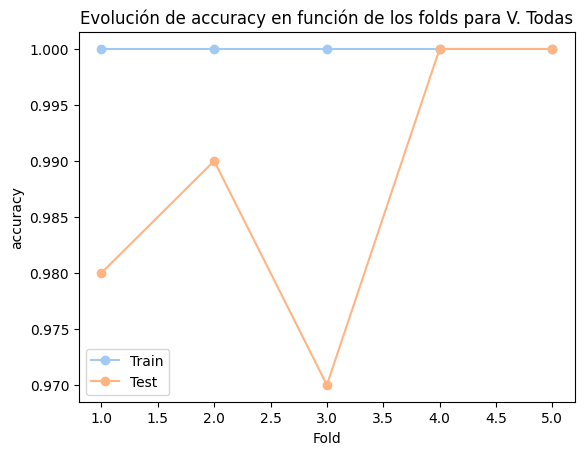

In [ ]:
metric = "accuracy"
feature_set = "V. Todas"
plot_metric_by_feature(results_df, metric, feature_set)

In [ ]:
#stacking

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from tabulate import tabulate
modelo_a_evaluar =  StackingClassifier(
    estimators= [
    ('dt', DecisionTreeClassifier(max_depth=4)),
    ('knn', KNeighborsClassifier(n_neighbors=3))
], # Estimadores base a usar en el stacking
    final_estimator=LogisticRegression() # Clasificador final que combina las predicciones de los estimadores base
)
results_df = evaluate_decision_tree(X, y,modelo_a_evaluar)
results_df['Score'] = results_df['Score'].apply(lambda x: [round(val, 2) for val in x])
table = tabulate(results_df, headers='keys', tablefmt='psql')
# Imprimir la tabla
print(table)


+----+------------------------------+--------------------------+--------------------------------+
|    | Feature Set                  | Metric                   | Score                          |
|----+------------------------------+--------------------------+--------------------------------|
|  0 | V. biologicas y de region    | accuracy Train (CV 1-5:) | [0.98, 0.98, 0.98, 0.98, 0.98] |
|  1 | V. biologicas y de region    | accuracy Test (CV 1-5:)  | [0.94, 0.97, 0.93, 0.97, 0.95] |
|  2 | V. biologicas y de region    | f1_macro Train (CV 1-5:) | [0.98, 0.98, 0.98, 0.98, 0.98] |
|  3 | V. biologicas y de region    | f1_macro Test (CV 1-5:)  | [0.94, 0.97, 0.93, 0.97, 0.95] |
|  4 | V. temporales y de ubicacion | accuracy Train (CV 1-5:) | [0.99, 0.81, 0.77, 0.78, 0.78] |
|  5 | V. temporales y de ubicacion | accuracy Test (CV 1-5:)  | [0.77, 0.77, 0.76, 0.75, 0.79] |
|  6 | V. temporales y de ubicacion | f1_macro Train (CV 1-5:) | [0.99, 0.8, 0.77, 0.77, 0.77]  |
|  7 | V. temporales

Partiendo de los resultados obtenidos usando stacking y decision tree y KNN como estimadores.

Variables Biológicas y de Región: Los valores de accuracy obtenidos sobre el conjunto de entrenamiento son bastante buenos, con un promedio de 0.98. En el conjunto de test, los valores son bastante buenos también, con un promedio de 0.95. Como podemos observar, este modelo se ajusta bastante bien a los conjuntos y generaliza bastante bien también.

Variables Temporales y de Ubicación: Con esta combinación obtenemos un modelo que da unos resultados muy variados, entre 0.77 y 0.99. En el conjunto de test, se obtienen resultados más uniformes pero algo bajos, sobre el 0.77 . Según estos resultados podemos observar que este modelo no llega a adaptarse bien sobre el conjunto.

Todas las Variables: Con esta combinación obtenemos un modelo que también se ajusta bien a los datos del conjunto de entrenamiento, con un promedio de 0.93. Y al igual que en el conjunto de entrenamiento, en el conjunto de test, se obtienen unos resultados bastante buenos, con un promedio de 0.90 .

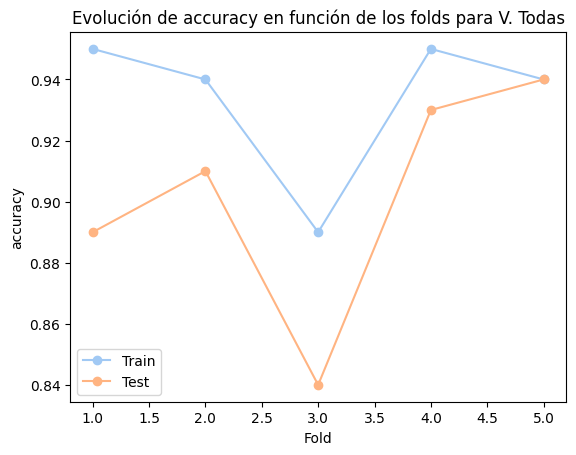

In [ ]:
metric = "accuracy"
feature_set = "V. Todas"
plot_metric_by_feature(results_df, metric, feature_set)